## IMPORTING LIBRARIES

In [93]:
import pandas as pd
import nltk 
import numpy as np
import re
from nltk.stem import wordnet # to perform lemmitization
from sklearn.feature_extraction.text import CountVectorizer # to perform bow
from sklearn.feature_extraction.text import TfidfVectorizer # to perform tfidf
from nltk import pos_tag # for parts of speech
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
from nltk import word_tokenize # to create tokens
from nltk.corpus import stopwords # for stop words
import warnings
warnings.filterwarnings("ignore")

## IMPORTING DATASET

In [94]:
df=pd.read_excel('dataset.xlsx')
df.head(20)

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
0,"Dear name,\n\nIt’s my absolute pleasure to rec...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,"Dear Professor name,\n\nMy name is name. I was...",NaN,NaN
2,"Dear name,\n\nI’m reaching out to request a le...",NaN,NaN
3,"Dear name,\n\nMy name is name. I volunteered a...",NaN,NaN
4,"Dear name,\n\nI am writing to you to request t...",NaN,NaN
5,"Dear Professor name,\n\nI have greatly enjoyed...",NaN,NaN
6,To whom it may concern:\n\nIt is my pleasure t...,NaN,NaN
7,"Dear Sir,\n\nI am sending herewith a team of t...",NaN,NaN
8,Dear name: \nname Applicant has worked directl...,NaN,NaN
9,"Dear name, \n1 am contacting you today in rega...",NaN,NaN


In [95]:
# count the number of rows in dataset
df.count()

CONTEXT_OF_SAMPLE_MAIL    318
EMAIL_TEMPLATES            34
EMAIL_TOPICS               34
dtype: int64

### Fills the null value with the previous value.

In [96]:
df.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
0,"Dear name,\n\nIt’s my absolute pleasure to rec...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,"Dear Professor name,\n\nMy name is name. I was...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
2,"Dear name,\n\nI’m reaching out to request a le...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
3,"Dear name,\n\nMy name is name. I volunteered a...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
4,"Dear name,\n\nI am writing to you to request t...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
...,...,...,...
313,"Hotel Reservation Letter Sample\nNovember 23, ...",Hotel Booking Confirmation ...,Hotel Booking Confirmation
314,PUBLIC\nCHICAGO\nWE LOOK\nFORWARD TO\nSEEING Y...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
315,"www.setupmyhotel.com\nHotel Name\nAddress,\nT ...",Hotel Booking Confirmation ...,Hotel Booking Confirmation
316,"Hotel Riu Costa Lago - All Inclusive, Torremol...",Hotel Booking Confirmation ...,Hotel Booking Confirmation


In [97]:
# count the number of rows in dataset after filling null values
df.count()

CONTEXT_OF_SAMPLE_MAIL    318
EMAIL_TEMPLATES           318
EMAIL_TOPICS              318
dtype: int64

#### DATASET DESCRIPTION

In [98]:
df.describe()

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
count,318,318,318
unique,310,34,34
top,Hello name\nI hope all is great with you. I wo...,LEAVE LETTER: ...,Patient Booking Confirmation
freq,3,10,10


In [99]:
df1=df.head(10) # copy of first ten rows of dataset

In [100]:
# function that converts text into lower case and removes special characters

def step1(x):
    for i in x:
        a=str(i).lower()
        p=re.sub(r'[^a-z0-9]',' ',a)
        print(p)

## SAMPLE VISUALIZATION OF 1st 10 mails

In [101]:
step1(df1['CONTEXT_OF_SAMPLE_MAIL'])

dear name   it s my absolute pleasure to recommend name for the sales manager position with the sales company   joanne and i worked together at generic sales company  where i was her manager and direct supervisor from 2015 to 2019   i thoroughly enjoyed my time working with joanne and came to know her as a truly valuable asset to our team  she is honest  dependable  and incredibly hardworking  beyond that  she is an impressive problem solver who is able to address complex issues strategically and confidently name is inspired by challenges and never intimidated by them   her knowledge of sales etiquette and expertise in cold calling was a huge advantage to our entire office  not only did she put this skill set to work  but she also led a series of training sessions on cold calling with the team increasing our total sales by over 18  in just one quarter  i know that name was a huge piece of our success   along with her undeniable talent  name has always been an absolute joy to work with 

## CLEANING THE MAILS

In [102]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [103]:
df['CONTEXT_OF_SAMPLE_MAIL'] = df.CONTEXT_OF_SAMPLE_MAIL.apply(clean)
df.CONTEXT_OF_SAMPLE_MAIL

0      dear name\n\nits my absolute pleasure to recom...
1      dear professor name\n\nmy name is name i was y...
2      dear name\n\nim reaching out to request a lett...
3      dear name\n\nmy name is name i volunteered at ...
4      dear name\n\ni am writing to you to request th...
                             ...                        
313    hotel reservation letter sample\nnovember  \nt...
314    public\nchicago\nwe look\nforward to\nseeing y...
315    wwwsetupmyhotelcom\nhotel name\naddress\nt  f ...
316    hotel riu costa lago  all inclusive torremolin...
317    setup my hotel\nsample forms documents and dis...
Name: CONTEXT_OF_SAMPLE_MAIL, Length: 318, dtype: object

In [104]:
df.head()

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER


In [105]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['CONTEXT_OF_SAMPLE_MAIL'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,to,1738
1,the,1462
2,you,1134
3,and,1109
4,of,821
...,...,...
4784,method,1
4785,ta,1
4786,thereafter,1
4787,medium,1


In [106]:
text = ' '.join(df['CONTEXT_OF_SAMPLE_MAIL'])
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)

<FreqDist with 4831 samples and 42559 outcomes>


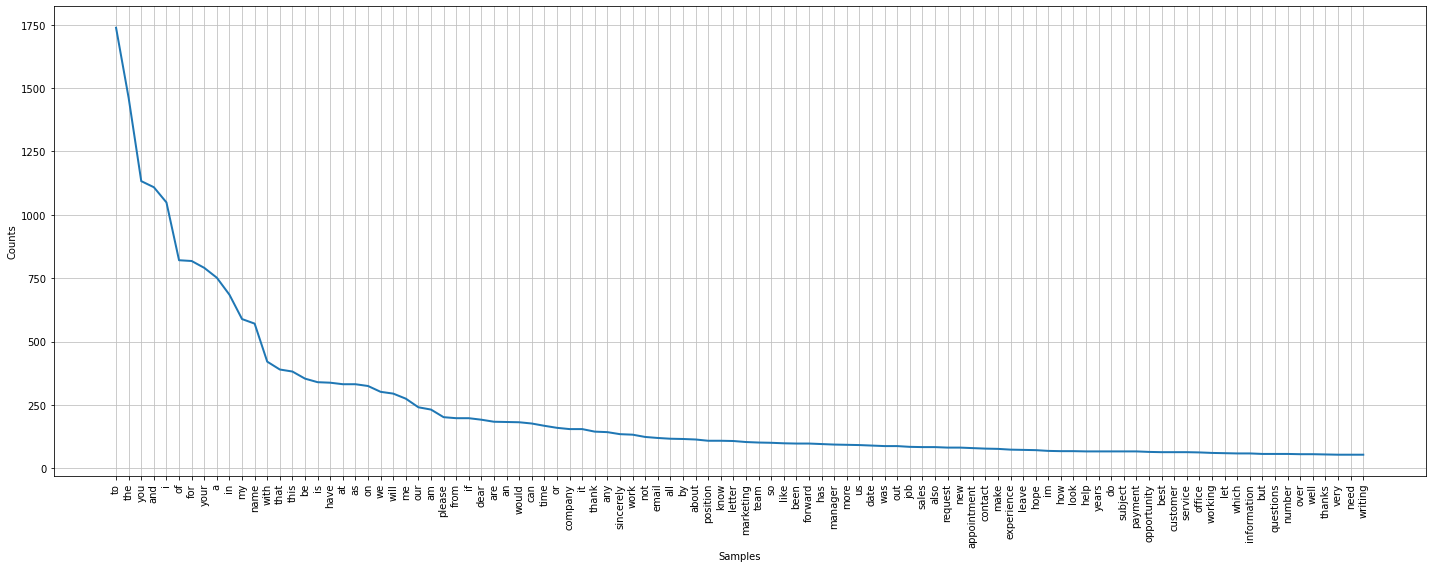

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

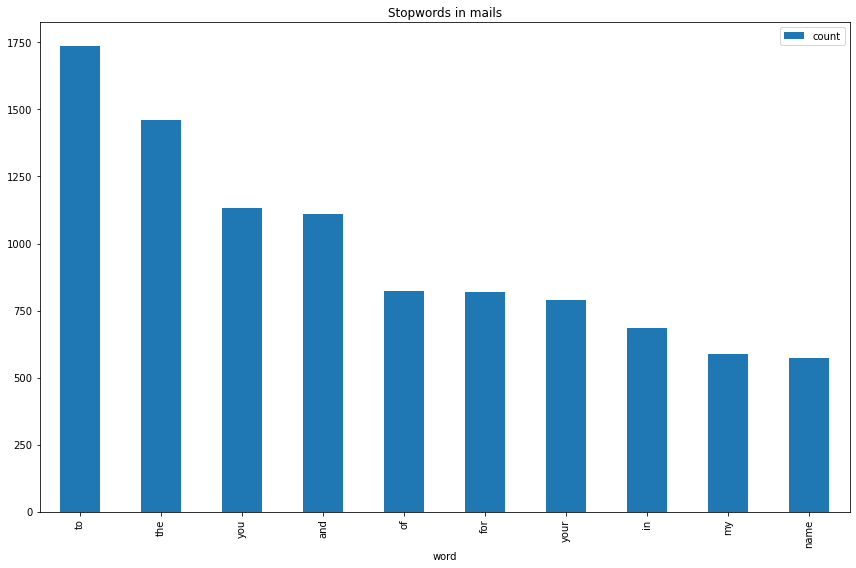

In [108]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Stopwords in mails')

## THERE ARE SO MANY STOPWORDS WE NEED TO REMOVE THAT

In [109]:
# all the stop words we have 
stop = stopwords.words('english')
new_words=('dear','name', 'work', 'email','please','would','time','company','sincerely')
for i in new_words:
    stop.append(i)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## REMOVING STOPWORDS

In [110]:
df['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'] = df['CONTEXT_OF_SAMPLE_MAIL'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [111]:
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS,CONTEXT_OF_SAMPLE_MAIL_without_stopwords
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,absolute pleasure recommend sales manager posi...
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,professor student business marketing fall seme...
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,im reaching request letter recommendation rega...
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,volunteered san francisco aspca elk dr supervi...
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,writing request provide reference begin job se...
...,...,...,...,...
313,hotel reservation letter sample\nnovember \nt...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel reservation letter sample november hotel...
314,public\nchicago\nwe look\nforward to\nseeing y...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,public chicago look forward seeing mr mcguire ...
315,wwwsetupmyhotelcom\nhotel name\naddress\nt f ...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,wwwsetupmyhotelcom hotel address f e adminsetu...
316,hotel riu costa lago all inclusive torremolin...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel riu costa lago inclusive torremolinos ma...


In [112]:
book = [x.strip() for x in df.CONTEXT_OF_SAMPLE_MAIL] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

# LEMMATIZATION TEXT

In [113]:
# function that performs text normalization steps

def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words) # returns the lemmatized tokens as a sentence 

In [114]:
text_normalization('dear arya smith   it s my absolute pleasure to recommend joanne adams for the sales manager position with the sales company   joanne and i worked together at generic sales company  where i was her manager and direct supervisor from 2015 to 2019   i thoroughly enjoyed my time working with joanne and came to know her as a truly valuable asset to our team  she is honest  dependable  and incredibly hardworking  beyond that  she is an impressive problem solver who is able to address complex issues strategically and confidently  joanne is inspired by challenges and never intimidated by them   her knowledge of sales etiquette and expertise in cold calling was a huge advantage to our entire office  not only did she put this skill set to work  but she also led a series of training sessions on cold calling with the team increasing our total sales by over 18  in just one quarter  i know that joanne was a huge piece of our success   along with her undeniable talent  joanne has always been an absolute joy to work with  she is a true team player  and always fosters positive discussions and brings the best out of other employees   without a doubt  i confidently recommend joanne to join your team at the sales company  as a dedicated and knowledgeable employee and an all around great person  i know that she will be a beneficial addition to your organization   please feel free to contact me at 555 123 4567 if you want to discuss joanne s qualifications and experience further  i d be happy to expand on my recommendation   best wishes   kat boogaard director of sales generic sales company')

'dear arya smith it s my absolute pleasure to recommend joanne adam for the sale manager position with the sale company joanne and i work together at generic sale company where i be her manager and direct supervisor from to i thoroughly enjoy my time work with joanne and come to know her a a truly valuable asset to our team she be honest dependable and incredibly hardworking beyond that she be an impressive problem solver who be able to address complex issue strategically and confidently joanne be inspire by challenge and never intimidate by them her knowledge of sale etiquette and expertise in cold call be a huge advantage to our entire office not only do she put this skill set to work but she also lead a series of train session on cold call with the team increase our total sale by over in just one quarter i know that joanne be a huge piece of our success along with her undeniable talent joanne have always be an absolute joy to work with she be a true team player and always foster pos

In [115]:
df['lemmatized_text']=df['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'].apply(text_normalization) # applying the fuction to the dataset to get clean text
df.tail(15)

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS,CONTEXT_OF_SAMPLE_MAIL_without_stopwords,lemmatized_text
303,hello \n\nit looks like your car is almost due...,Car Sales :Service Reminder ...,Service Reminder,hello looks like car almost due maintenance he...,hello look like car almost due maintenance hel...
304,hello \n\nnobody likes the hassle of getting t...,Car Sales :Service Reminder ...,Service Reminder,hello nobody likes hassle getting car serviced...,hello nobody like hassle get car service coupl...
305,service reminders outstanding recommendations...,Car Sales :Service Reminder ...,Service Reminder,service reminders outstanding recommendations ...,service reminder outstanding recommendation su...
306,service customer intermediate service reminde...,Car Sales :Service Reminder ...,Service Reminder,service customer intermediate service reminder...,service customer intermediate service reminder...
307,service customer we havent seen you\nsubject ...,Car Sales :Service Reminder ...,Service Reminder,service customer havent seen subject customer ...,service customer havent see subject customer h...
308,\naddress sender\ndate june \nname recipient...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,address sender date june recipient address rec...,address sender date june recipient address rec...
309,dear \n\nthis email is to confirm your booking...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,confirm booking single room three nights break...,confirm book single room three night breakfast...
310,dear name\n\n thank you for choosing to st...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,thank choosing stay us sample hotel pleased co...,thank choose stay u sample hotel please confir...
311,reservation letter for hotel sample\nname inn\...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,reservation letter hotel sample inn big indian...,reservation letter hotel sample inn big indian...
312,from\nname\nmanager\nqueen marts hotel\n brand...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,manager queen marts hotel brandy court oakland...,manager queen mart hotel brandy court oakland ...


## COUNT OF WORDS AFTER LEMMATIZATION

In [116]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X1 = cv.fit_transform(df['lemmatized_text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']

wf_df1

,word,count
0,appointmenti,1109
1,reverence,821
2,inclusion,818
3,mention,685
4,recover,589
...,...,...
3810,nonsmoking,1
3811,mineral,1
3812,refund,1
3813,thereafter,1


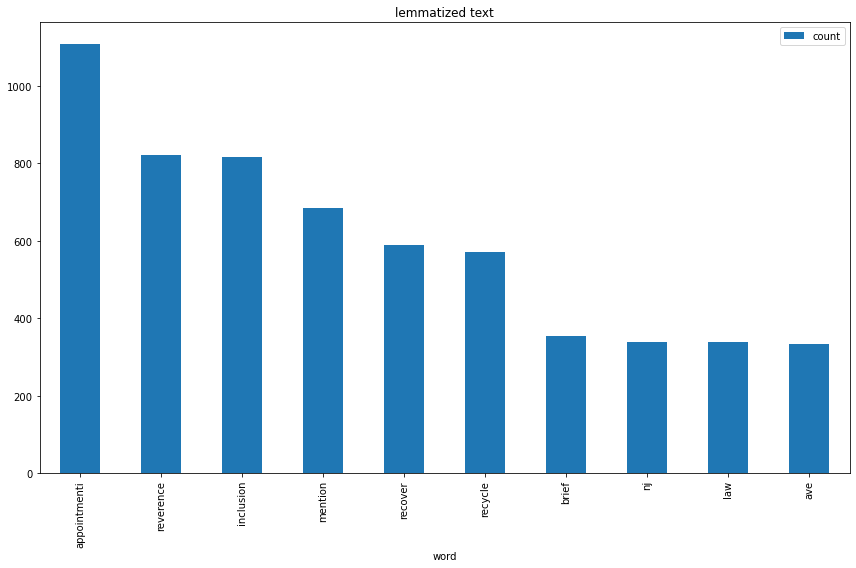

In [117]:
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='lemmatized text')

## FREQUENCY OF WORDS AFTER LEMMATIZATION

In [118]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['lemmatized_text']).split()).value_counts()[:50] # for top 20
freq_Sw

thank          158
make           122
position       122
look           119
know           118
letter         110
request        107
team           105
year           102
like           100
forward         98
date            98
manager         97
job             95
leave           94
help            92
u               92
take            88
experience      88
work            88
appointment     86
contact         85
customer        84
also            84
sale            84
new             83
service         82
marketing       82
write           82
opportunity     79
need            78
get             78
regard          74
day             73
hope            73
im              69
subject         68
payment         68
office          66
well            65
project         65
best            64
want            64
let             64
week            63
number          62
question        61
information     59
call            59
reach           57
dtype: int64

In [119]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

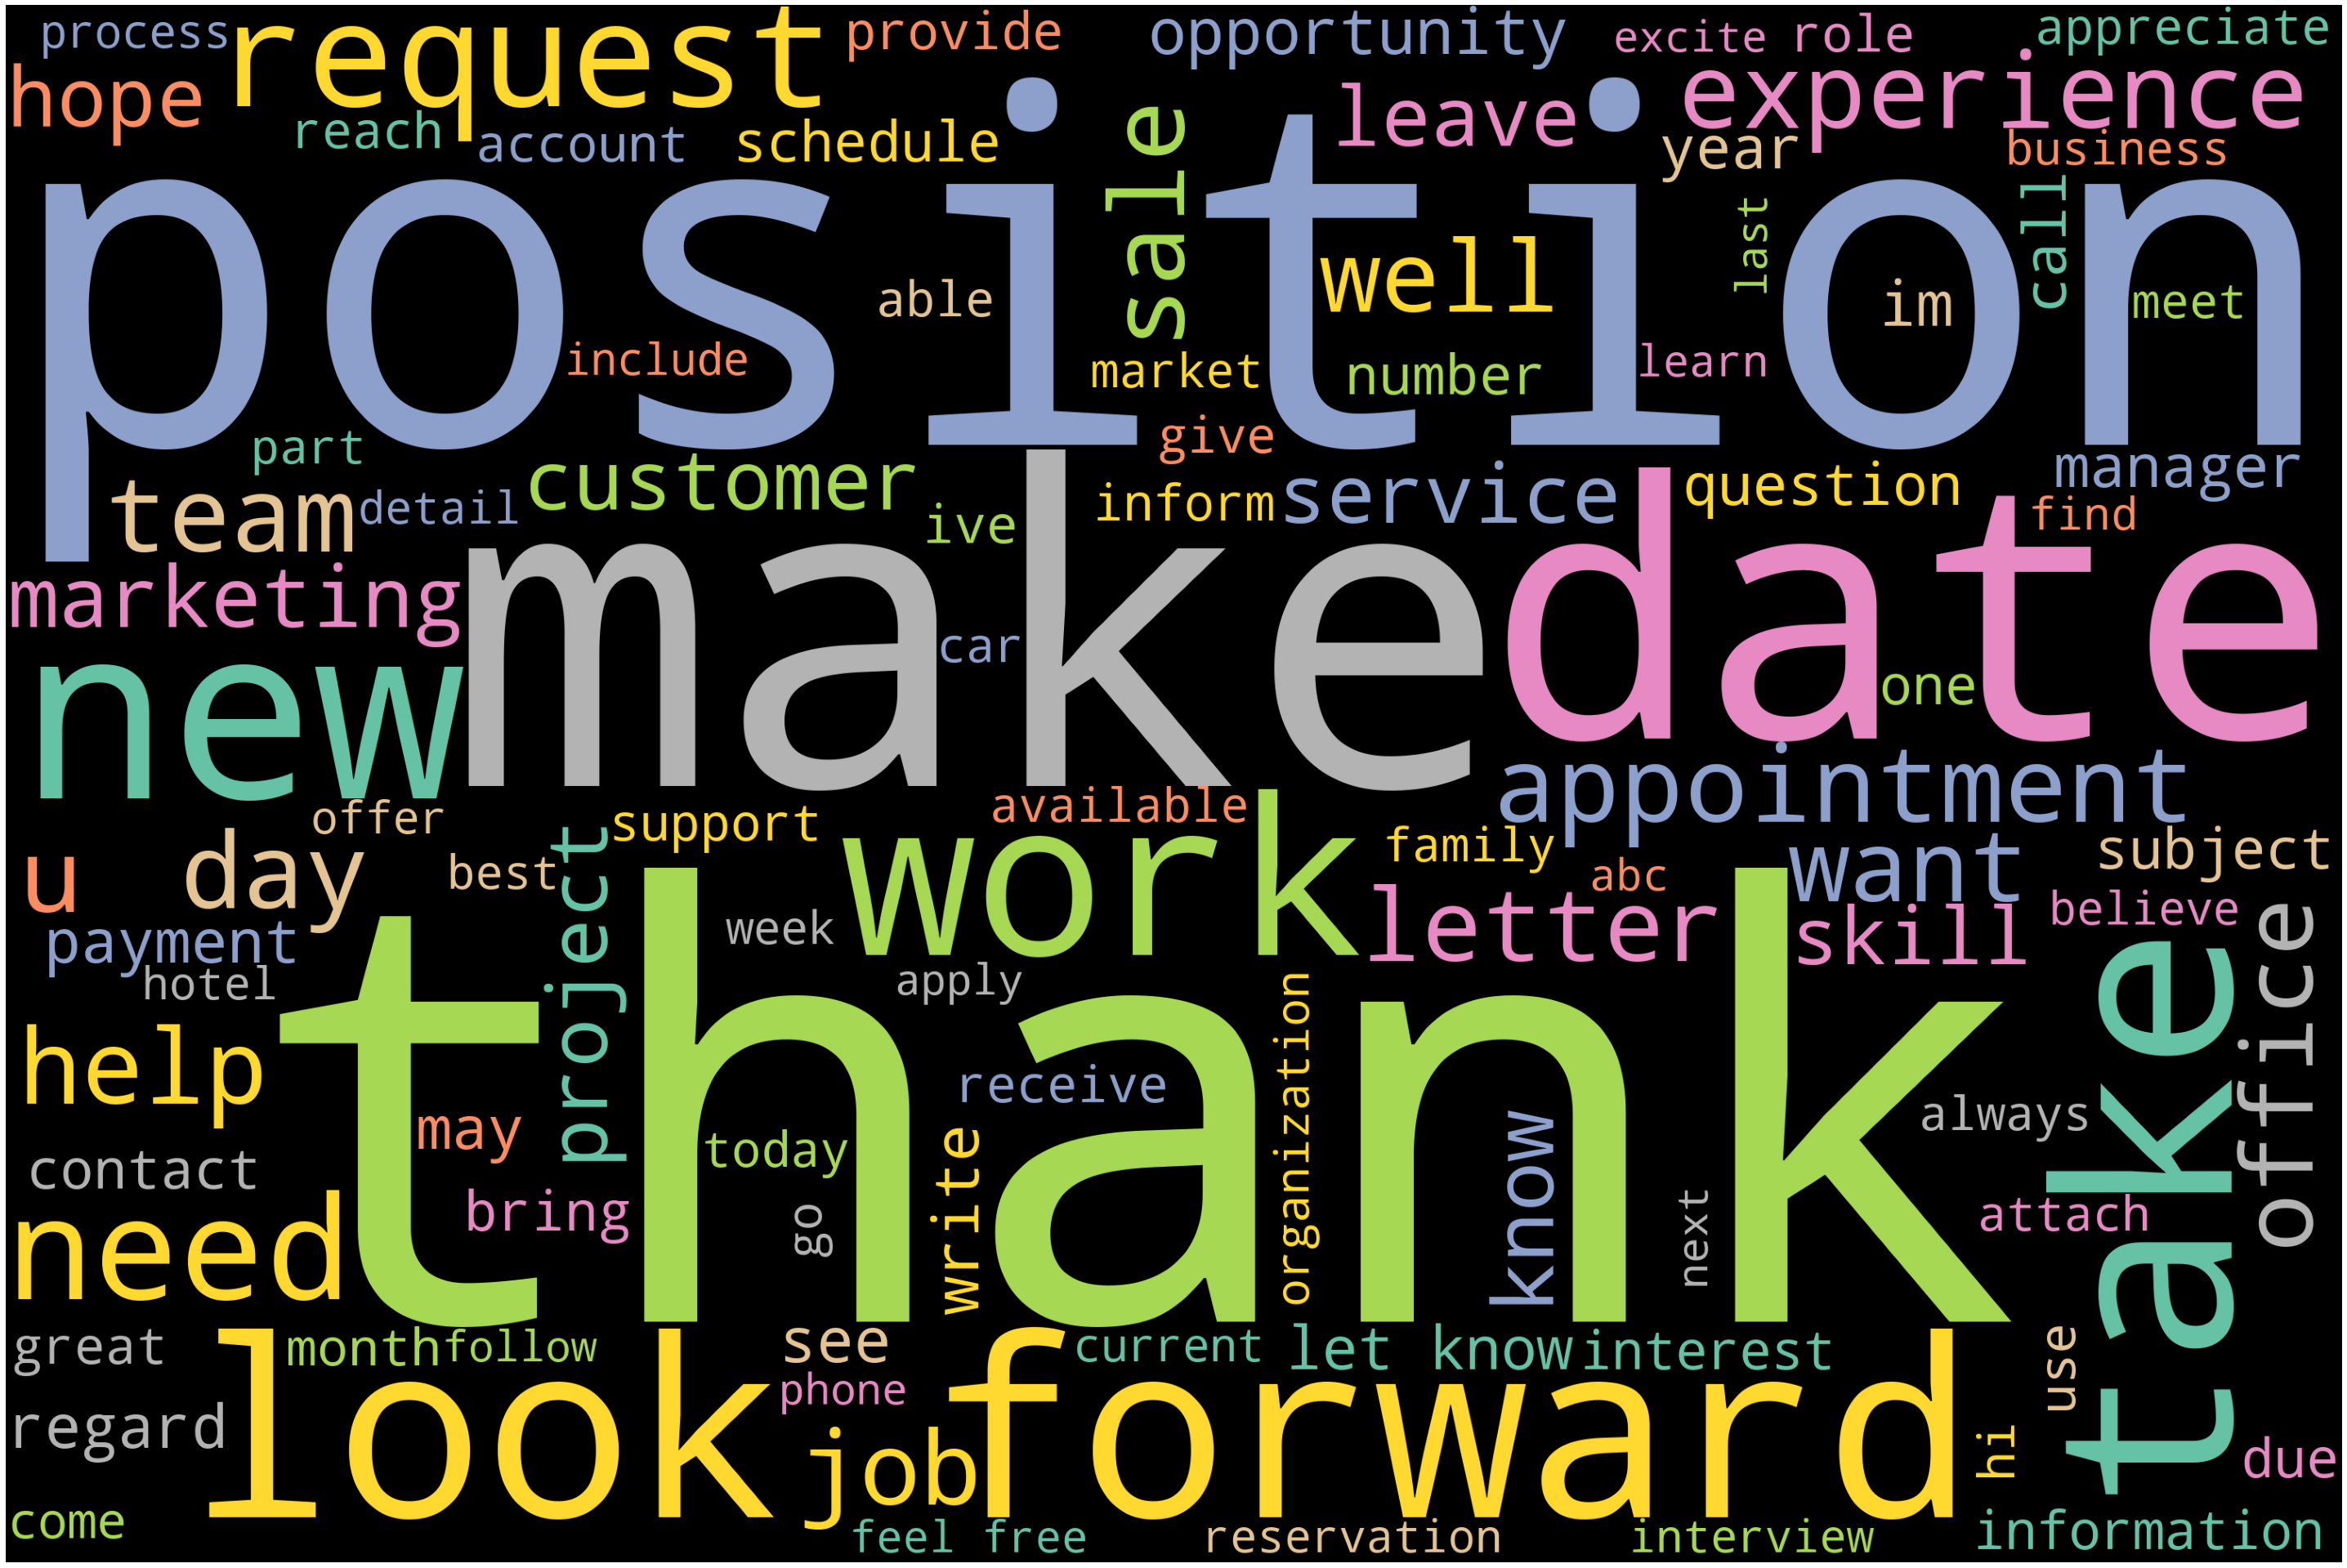

In [120]:
text = df['lemmatized_text'].values 

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(str(text))
plot_cloud(wordcloud)

## DEFINE A NEW DATADRAME

In [121]:
data = df[["lemmatized_text","EMAIL_TEMPLATES","EMAIL_TOPICS"]]
data

,lemmatized_text,EMAIL_TEMPLATES,EMAIL_TOPICS
0,absolute pleasure recommend sale manager posit...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,professor student business market fall semeste...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
2,im reach request letter recommendation regard ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
3,volunteered san francisco aspca elk dr supervi...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
4,write request provide reference begin job sear...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
...,...,...,...
313,hotel reservation letter sample november hotel...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
314,public chicago look forward see mr mcguire tha...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
315,wwwsetupmyhotelcom hotel address f e adminsetu...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
316,hotel riu costa lago inclusive torremolinos ma...,Hotel Booking Confirmation ...,Hotel Booking Confirmation


# NAMED ENTITY RECOGNITION

In [122]:
import spacy
nlp = spacy.load('en')
text_nlp = nlp(no_punc_text)

In [123]:
# print named entities in article
ner_tagged = [(word.text, word.ent_type_) for word in text_nlp]
from spacy import displacy

# visualize named entities
displacy.render(text_nlp, style='ent', jupyter=True)

In [124]:
named_entities = []
temp_entity_name = ''
temp_named_entity = None
for term, tag in ner_tagged:
    if tag:
        temp_entity_name = ' '.join([temp_entity_name, term]).strip()
        temp_named_entity = (temp_entity_name, tag)
    else:
        if temp_named_entity:
            named_entities.append(temp_named_entity)
            temp_entity_name = ''
            temp_named_entity = None

In [125]:
print(named_entities)

[('the fall', 'DATE'), ('lexington', 'GPE'), ('the san francisco aspca', 'FAC'), ('about three years ago', 'DATE'), ('this spring', 'DATE'), ('four', 'CARDINAL'), ('the past three years', 'DATE'), ('office hours', 'TIME'), ('over three years', 'DATE'), ('sanjay', 'PERSON'), ('beautifully express', 'ORG'), ('hours', 'TIME'), ('nameemailcom', 'ORG'), ('hr', 'PERSON'), ('ten boys the third year', 'DATE'), ('tenday', 'DATE'), ('six boys and four', 'QUANTITY'), ('this year', 'DATE'), ('next four years', 'DATE'), ('tomorrow morning', 'TIME'), ('the past six months', 'DATE'), ('one', 'CARDINAL'), ('washington dc', 'ORG'), ('summer', 'DATE'), ('today', 'DATE'), ('two years', 'DATE'), ('five years', 'DATE'), ('houston tx', 'ORG'), ('more than years', 'DATE'), ('mba degree', 'WORK_OF_ART'), ('the coming days', 'DATE'), ('my first three years', 'DATE'), ('daily', 'DATE'), ('australia', 'GPE'), ('new zealand', 'GPE'), ('the sales department', 'ORG'), ('chicago', 'GPE'), ('harvard university', 'ORG

In [126]:
from collections import Counter
c = Counter([item[1] for item in named_entities])
c.most_common()

[('DATE', 422),
 ('ORG', 172),
 ('PERSON', 103),
 ('GPE', 98),
 ('CARDINAL', 51),
 ('TIME', 47),
 ('ORDINAL', 18),
 ('NORP', 12),
 ('FAC', 11),
 ('LOC', 7),
 ('PRODUCT', 5),
 ('WORK_OF_ART', 4),
 ('QUANTITY', 2),
 ('LANGUAGE', 2),
 ('MONEY', 1)]

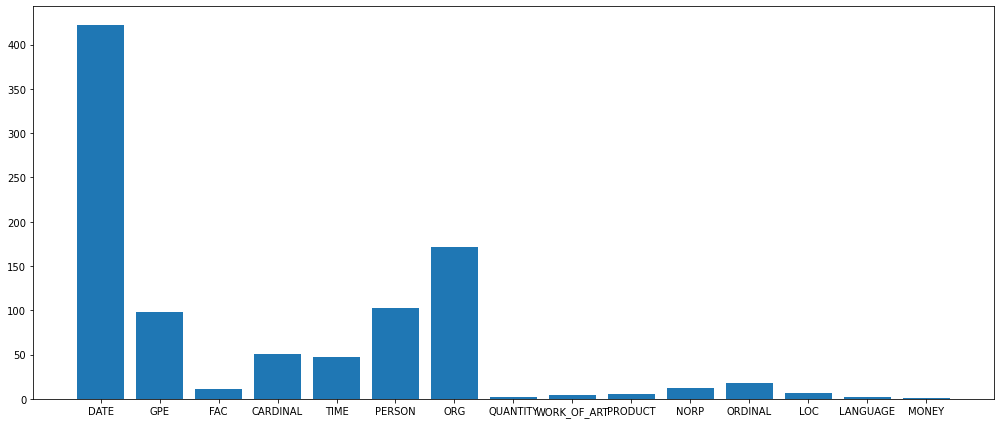

In [127]:
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams["figure.autolayout"] = True
plt.bar(c.keys(), c.values())

plt.show()

### PART OF SPEECH TAGGING

In [128]:
for token in text_nlp:
    print(token, token.pos_)

dear ADJ
name PROPN


 SPACE
its DET
my DET
absolute ADJ
pleasure NOUN
to PART
recommend VERB
name NOUN
for ADP
the DET
sales NOUN
manager NOUN
position NOUN
with ADP
the DET
sales NOUN
company NOUN


 SPACE
joanne PROPN
and CCONJ
i PRON
worked VERB
together ADV
at ADP
generic ADJ
sales NOUN
company NOUN
where ADV
i PRON
was AUX
her DET
manager NOUN
and CCONJ
direct ADJ
supervisor NOUN
from ADP
  SPACE
to ADP


 SPACE
i PRON
thoroughly ADV
enjoyed VERB
my DET
time NOUN
working VERB
with ADP
joanne PROPN
and CCONJ
came VERB
to PART
know VERB
her PRON
as SCONJ
a DET
truly ADV
valuable ADJ
asset NOUN
to ADP
our DET
team NOUN
she PRON
is AUX
honest ADJ
dependable ADJ
and CCONJ
incredibly ADV
hardworking ADJ
beyond ADP
that SCONJ
she PRON
is AUX
an DET
impressive ADJ
problem NOUN
solver NOUN
who PRON
is AUX
able ADJ
to PART
address VERB
complex ADJ
issues NOUN
strategically ADV
and CCONJ
confidentlyname NOUN
is AUX
inspired VERB
by ADP
challenges NOUN
and CCONJ
never ADV
intimidated VERB
by

discuss VERB
this DET
further ADJ


 SPACE
thanks NOUN
so ADV
much ADV
for ADP
all DET
you PRON
have AUX
done VERB
for ADP
me PRON
and CCONJ
for ADP
taking VERB
the DET
time NOUN
to PART
review VERB
this DET
request NOUN


 SPACE
sincerely ADV


 SPACE
name PROPN
signature PROPN
hard PROPN
copy PROPN
letter NOUN


 SPACE
name VERB
to ADP
whom PRON
it PRON
may VERB
concern VERB


 SPACE
it PRON
is AUX
my DET
pleasure NOUN
to PART
endorse VERB
name NOUN
for ADP
employment NOUN
in ADP
your DET
esteemed ADJ
organisation NOUN
i PRON
have AUX
known VERB
name NOUN
for ADP
over ADP
three NUM
years NOUN
during ADP
which DET
he PRON
worked VERB
as SCONJ
a DET
communication NOUN
executive NOUN
in ADP
my DET
office NOUN


 SPACE
i PRON
was AUX
highly ADV
impressed ADJ
with ADP
name NOUN
attitude NOUN
and CCONJ
efficiency NOUN
during ADP
the DET
time NOUN
that ADV
he PRON
worked VERB
with ADP
me PRON
name NOUN
is AUX
both DET
very ADV
bright ADJ
and CCONJ
highly ADV
professional ADJ
i PRON
am AUX
c

meet VERB
your DET
goals NOUN
i PRON
am AUX
available ADJ
at ADP
your DET
convenience NOUN
and CCONJ
hope VERB
to PART
hear VERB
from ADP
you PRON
soon ADV

 SPACE
thank VERB
you PRON
for ADP
your DET
consideration NOUN

 SPACE
sincerely ADV
name VERB
  SPACE
dear ADJ
name NOUN

 SPACE
namenovoresumecom PROPN
     SPACE
chicago PROPN
il PROPN
  SPACE
namecom PROPN
linkedincominname PROPN
in ADP

 SPACE
i PRON
am AUX
writing VERB
to PART
express VERB
my DET
interest NOUN
in ADP
the DET
doctoral ADJ
program NOUN
in ADP
the DET
department NOUN
of ADP
political ADJ
science NOUN
at ADP
harvard PROPN
university PROPN
as SCONJ
it PRON
has AUX
always ADV
been AUX
my DET
agelong ADJ
ambition NOUN
to PART
become VERB
a DET
political ADJ
advisor NOUN
to ADP
the DET
president NOUN
of ADP
the DET
united PROPN
states PROPN
of ADP
america PROPN

 SPACE
thanks NOUN
to ADP
the DET
swift ADJ
progress NOUN
of ADP
my DET
bachelors NOUN
and CCONJ
masters NOUN
degrees NOUN
it PRON
is AUX
glaring VERB
that D

make VERB
me PRON
a DET
great ADJ

 SPACE
candidate NOUN
for ADP
this DET
opening NOUN
i PRON
would VERB
love VERB
to PART
meet VERB
you PRON
and CCONJ
share VERB
more ADV
about ADP
my DET
previous ADJ
experience NOUN
if SCONJ
you PRON

 SPACE
have AUX
any DET
questions NOUN
please INTJ
give VERB
me PRON
a DET
call NOUN
at ADP
  SPACE
or CCONJ
email VERB
me PRON
at ADP
namenovoresumecom X


 SPACE
thank VERB
you PRON
for ADP
your DET
consideration NOUN


 SPACE
sincerely ADV

 SPACE
name PROPN
dear PROPN
name NOUN


 SPACE
i PRON
was AUX
thrilled ADJ
to PART
see VERB
the DET
opportunity NOUN
at ADP
munder PROPN
difflin PROPN
posted VERB
i PRON
believe VERB
my DET
current ADJ
role NOUN
would VERB

 SPACE
make VERB
me PRON
the DET
perfect ADJ
candidate NOUN
because SCONJ
of ADP
my DET
interest NOUN
in ADP
marketing NOUN
technology NOUN
experience NOUN

 SPACE
managing VERB
a DET
team NOUN
and CCONJ
enthusiasm NOUN
for ADP
the DET
work NOUN
your DET
team NOUN
has AUX
done VERB
to PART
mak

your DET
companys NOUN
customer NOUN
support NOUN
before ADP
emailing VERB
you PRON
and CCONJ
have AUX
attached VERB
a DET
screenshot NOUN
from ADP
your DET

 SPACE
website NOUN


 SPACE
i PRON
m VERB
sharing VERB
a DET
few ADJ
of ADP
my DET
thoughts NOUN
here ADV
which DET
could VERB
help VERB
you PRON
save VERB
you PRON
agents NOUN
time NOUN
and CCONJ
boost VERB
productivity NOUN


   SPACE
noticed VERB
that SCONJ
your DET
phone NOUN
email NOUN
and CCONJ
web NOUN
forms NOUN
are AUX
not PART
connected VERB
to ADP
a DET
centralized ADJ
helpdesk NOUN
streamlining VERB
your DET
customer NOUN
support NOUN

 SPACE
channels NOUN
reduces VERB
agent NOUN
workload PROPN
and CCONJ
boosts VERB
productivity NOUN


  SPACE
considering VERB
that DET
email NOUN
is AUX
one NUM
of ADP
your DET
main ADJ
support NOUN
channels NOUN
  SPACE
thought VERB
you PRON
d SYM
like VERB
to PART
know VERB
that SCONJ
boosted VERB
team NOUN
collaboration NOUN
and CCONJ

 SPACE
productivity NOUN
using VERB
our DET
hel


 SPACE
has AUX
to PART
offer VERB
and CCONJ
hope VERB
to PART
see VERB
you PRON
there ADV
on ADP
the DET



 SPACE
sincerely ADV

 SPACE
name NOUN

 SPACE
founder NOUN
and CCONJ
ceo PROPN
whimsical PROPN
stationery PROPN
store NOUN

  SPACE
dear ADJ
name NOUN


 SPACE
i PRON
m VERB
the DET
author NOUN
of ADP
last ADJ
minute NOUN
meetings NOUN
a DET
book NOUN
i PRON
hope VERB
you PRON
ll VERB
consider VERB
for ADP
possible ADJ

 SPACE
inclusion NOUN
in ADP
your DET
catalog NOUN
and CCONJ
offerings NOUN
last ADJ
minute NOUN
meetings NOUN
provides VERB
numerous ADJ

 SPACE
uptodate ADJ
resources NOUN
and CCONJ
ideas NOUN
to PART
help VERB
plan VERB
a DET
meeting NOUN
— PUNCT
quickly ADV
if SCONJ
need NOUN
be AUX
and CCONJ

 SPACE
on ADP
budget NOUN


 SPACE
this DET
book NOUN
would VERB
be AUX
an DET
excellent ADJ
fit NOUN
with ADP
your DET
current ADJ
offerings NOUN
for ADP
people NOUN
new ADJ
to ADP

 SPACE
the DET
industry NOUN
it PRON
explains VERB
in ADP
simple ADJ
language NOUN
the

and CCONJ
resume VERB
for ADP
your DET
review NOUN
i PRON
hope VERB
you PRON
ll VERB
contact VERB
me PRON
at ADP
your DET
convenience NOUN
to PART
discuss VERB
the DET
program NOUN
and CCONJ
to PART
arrange VERB
an DET
interview NOUN
thank VERB
you PRON
for ADP
your DET
time NOUN


 SPACE
best ADJ


 SPACE
name PROPN
dear PROPN
name PROPN


 

 SPACE
please INTJ
find VERB
attached VERB
a DET
copy NOUN
of ADP
my DET
resume NOUN
for ADP
the DET
customer NOUN
service NOUN
team NOUN
lead VERB
position NOUN
with ADP
xyz PROPN


 

 SPACE
as SCONJ
a DET
senior ADJ
csr NOUN
with ADP
abc PROPN
corp PROPN
i PRON
ve VERB
designed VERB
and CCONJ
supervised VERB
phone NOUN
and CCONJ
online NOUN
surveying NOUN
activities NOUN
prior ADV
to ADP
the DET
launch NOUN
of ADP
our DET
new ADJ
line NOUN
of ADP
products NOUN
the DET
result NOUN
in ADP
  SPACE
months NOUN
i PRON
ve VERB
raised VERB
customer NOUN
experience NOUN
phone NOUN
survey NOUN
ratings NOUN
by ADP
  SPACE
and CCONJ
boosted VERB
customer

ecommerce NOUN
features NOUN
after ADP
launch NOUN

 SPACE
continued VERB
to PART
lead VERB
optimization NOUN
efforts NOUN
through ADP
ab PROPN
testing VERB
  SPACE
improved VERB
the DET
clickthrough NOUN
rate NOUN
by ADP
  SPACE
and CCONJ

 SPACE
reduced VERB
the DET
bounce NOUN
rate NOUN
on ADP
the DET
websites NOUN
landing VERB
page NOUN
by ADP
  SPACE
as SCONJ
your DET
web NOUN
developer NOUN
  SPACE
would VERB
bring VERB

 SPACE
these DET
skills NOUN
to PART
develop VERB
websites NOUN
that DET
exceed VERB
the DET
expectations NOUN
of ADP
clients NOUN
and CCONJ
customers NOUN
and CCONJ
drive VERB
real ADJ


 SPACE
business NOUN
results NOUN


 SPACE
one NUM
of ADP
the DET
factors NOUN
that DET
really ADV
attracted VERB
me PRON
to ADP
this DET
role NOUN
is AUX
that SCONJ
  SPACE
values NOUN
giving VERB
back ADV
to ADP
the DET

 SPACE
community NOUN
in ADP
my DET
spare ADJ
time NOUN
  SPACE
run VERB
free ADJ
web NOUN
development NOUN
workshops NOUN
for ADP
atrisk NOUN
youths NOUN
in 

all DET
everyone PRON
here ADV
and CCONJ
discuss VERB
how ADV
we PRON
can VERB
work VERB
together ADV
towards ADP
our DET
continued VERB
success NOUN
in ADP
the DET
future NOUN
should VERB
you PRON
have AUX
any DET
questions NOUN
then ADV
i PRON
d VERB
be AUX
happy ADJ
to PART
answer VERB
them PRON
over ADP
email NOUN
or CCONJ
sit VERB
down ADP
and CCONJ
discuss VERB
them PRON
face NOUN
to ADP
face NOUN
please INTJ
do AUX
nt PART
hesitate VERB
to PART
get AUX
in ADP
touch NOUN


 SPACE
thanks NOUN


 
 SPACE
name PROPN
dear PROPN
name PROPN


 SPACE
i PRON
would VERB
lke VERB
to PART
take VERB
the DET
opportunity NOUN
ofintroducing VERB
myself PRON
as SCONJ
the DET
new ADJ
sales NOUN
agent NOUN
of ADP
xyz PROPN
company PROPN

 SPACE
have AUX
joined VERB
the DET
company NOUN
very ADV
recently ADV
from ADP
my DET
study NOUN
of ADP
the DET
records NOUN
of ADP
the DET
company NOUN
i PRON
understand VERB

 SPACE
that SCONJ
you PRON
are AUX
one NUM
of ADP
our DET
most ADV
valuable ADJ
custom

to ADP
my DET
email NOUN
address NOUN
abcdgmailcom PROPN

 SPACE
i PRON
will VERB
be AUX
grateful ADJ
for ADP
a DET
positive ADJ
reply NOUN
on ADP
my DET
leave NOUN
request NOUN

 SPACE
thank VERB
and CCONJ
regards NOUN

 SPACE
name NOUN

  SPACE
dear ADJ
name PROPN

 SPACE
i PRON
am AUX
writing VERB
this DET
letter NOUN
to PART
inform VERB
you PRON
that SCONJ
i PRON
have AUX
decided VERB
to PART
participate VERB
in ADP
an DET
executive ADJ
leadership NOUN
program NOUN
in ADP
the DET
coming VERB
month NOUN
of ADP
january PROPN
this DET
program NOUN
will VERB
be AUX
highly ADV
beneficial ADJ
both CCONJ
at ADP
personal ADJ
and CCONJ
professional ADJ
levels NOUN

 SPACE
i PRON
request VERB
you PRON
to PART
allow VERB
me PRON
a DET
leave NOUN
of ADP
absence NOUN
for ADP
a DET
period NOUN
of ADP
  SPACE
days NOUN
in ADP
lieu NOUN
of ADP
my DET
annual ADJ
leave NOUN
allowance NOUN
i PRON
will VERB
be AUX
leaving VERB
for ADP
the DET
program NOUN
on ADP
the DET
  SPACE
and CCONJ
will VERB
res

she PRON
had AUX
sanctioned VERB
me PRON
leaves VERB
on ADP
her DET
behalf NOUN
but CCONJ
i PRON
need VERB
your DET
signature NOUN
and CCONJ
go VERB
ahead ADV
sign VERB
to PART
book VERB
my DET
tickets NOUN
the DET
remaining VERB
tasks NOUN
will VERB
be AUX
accomplished VERB
once SCONJ
i PRON
board VERB
again ADV
to ADP
california PROPN
so SCONJ
you PRON
do AUX
nt PART
need VERB
to PART
worry VERB
much ADJ
about ADP
the DET
work NOUN
the DET
assignments NOUN
parent NOUN
concern NOUN
and CCONJ
the DET
other ADJ
related ADJ
duties NOUN
i PRON
hope VERB
you PRON
will VERB
understand VERB
my DET
situation NOUN
and CCONJ
grant VERB
me PRON
the DET
desired VERB
leaves NOUN
thanking VERB
in ADP
anticipation NOUN
for ADP
favorable ADJ
and CCONJ
prompt ADJ
action NOUN

 SPACE
yours PRON
faithfully ADV

 SPACE
name NOUN

  SPACE
respected VERB
madam PROPN

 SPACE
it PRON
is AUX
to PART
bring VERB
to ADP
your DET
kind NOUN
attention NOUN
that DET
my DET
daughter NOUN
had AUX
a DET
severe ADJ
acci

in ADP
my DET
absence NOUN


 SPACE
i PRON
hope VERB
you PRON
will VERB
accept VERB
my DET
request NOUN
and CCONJ
grant VERB
me PRON
leaves VERB
for ADP
the DET
said VERB
dates NOUN
looking VERB
forward ADV
to ADP
your DET
positive ADJ
reply NOUN


 SPACE
regards VERB

 SPACE
name NOUN

 SPACE
assistant NOUN
manager NOUN
marketing NOUN
dear ADJ
name NOUN


 SPACE
i PRON
am AUX
writing VERB
this DET
letter NOUN
to PART
notify VERB
you PRON
formally ADV
that SCONJ
i PRON
am AUX
resigning VERB
from ADP
my DET
position NOUN
as SCONJ
assistant ADJ
sales NOUN
manager NOUN
of ADP
lebronx NOUN
properties NOUN
limited VERB
effective ADJ
december PROPN


 SPACE
i PRON
appreciate VERB
the DET
opportunity NOUN
for ADP
professional ADJ
growth NOUN
you PRON
provided VERB
during ADP
my DET
time NOUN
at ADP
name NOUN
properties NOUN
limited VERB
thank VERB
you PRON
for ADP
your DET
support NOUN
and CCONJ
encouragement NOUN


 SPACE
please INTJ
let VERB
me PRON
know VERB
how ADV
i PRON
can VERB
help VE

best ADJ
and CCONJ
look VERB
forward ADV
to ADP
keeping VERB
in ADP
touch NOUN


 SPACE
sincerely ADV

 SPACE
name VERB
hot ADJ
jobs NOUN
on ADP
the DET
muse NOUN

 SPACE
sales NOUN
jobs NOUN

 SPACE
marketing NOUN
jobs NOUN

 SPACE
product NOUN
jobs NOUN

 SPACE
software NOUN
engineering NOUN
jobs NOUN

 SPACE
explore VERB
all DET
jobs NOUN

 SPACE
by ADP

 SPACE
name NOUN

 SPACE
person NOUN
on ADP
laptop NOUN

 SPACE
nameimages NOUN

 SPACE
so ADV
you PRON
ve VERB
decided VERB
to PART
move VERB
on ADP
you PRON
ve VERB
signed VERB
on ADP
the DET
dotted ADJ
line NOUN
at ADP
your DET
new ADJ
gig NOUN
and CCONJ
now ADV
all DET
that DET
s VERB
standing VERB
in ADP
between ADP
you PRON
and CCONJ
your DET
fab ADJ
new ADJ
job NOUN
is AUX
submitting VERB
your DET
resignation NOUN
letter NOUN
to ADP
your DET
current ADJ
one NUM


 SPACE
gulp ADP


 SPACE
while SCONJ
this DET
is AUX
nt PART
the DET
first ADJ
step NOUN
of ADP
quitting VERB
your DET
job NOUN
that DET
would VERB
be AUX
sitting VE

knowledge NOUN
and CCONJ
experience NOUN
about ADP
supply NOUN
chain NOUN
management NOUN
in ADP
an DET
ecommerce ADJ
field NOUN
i PRON
was AUX
also ADV
a DET
part NOUN
of ADP
the DET
team NOUN
that DET
was AUX
responsible ADJ
for ADP
planning VERB
and CCONJ
executing VERB
new ADJ
inbound ADJ
supply NOUN
chain NOUN
processes NOUN


 SPACE
working VERB
at ADP
your DET
esteemed ADJ
ecommerce PROPN
organisation NOUN
is AUX
the DET
dream NOUN
of ADP
every DET
person NOUN
who PRON
wants VERB
to PART
make VERB
a DET
career NOUN
in ADP
supply NOUN
chain NOUN
management NOUN
with ADP
my DET
experience NOUN
and CCONJ
skills NOUN
i PRON
will VERB
surely ADV
be AUX
able ADJ
to PART
add VERB
value NOUN
to ADP
your DET
business NOUN


 SPACE
i PRON
request VERB
you PRON
to PART
consider VERB
my DET
application NOUN
for ADP
the DET
role NOUN
my DET
resume NOUN
and CCONJ
cover NOUN
letter NOUN
are AUX
attached VERB
to ADP
the DET
email NOUN
please INTJ
refer VERB
to ADP
them PRON
for ADP
more ADJ
inf

a DET
reschedule NOUN
if SCONJ
this DET
could VERB
be AUX
avoided VERB
i PRON
m VERB
really ADV
looking VERB
forward ADV
to ADP
meeting VERB
you PRON
and CCONJ
talking VERB
about ADP
the DET
role NOUN
thank VERB
you PRON
for ADP
understanding VERB


 SPACE
yours PRON
sincerely ADV

 SPACE
name VERB
subject ADJ
line NOUN
rescheduling VERB
your DET
interview NOUN
at ADP
  SPACE
for ADP
the DET
  SPACE
position NOUN


 SPACE
dear INTJ
hi INTJ


 SPACE
i PRON
m VERB
writing VERB
to PART
inform VERB
you PRON
that SCONJ
unfortunately ADV
we PRON
will VERB
need VERB
to PART
reschedule VERB
our DET
interview NOUN
for ADP
the DET
open ADJ
  SPACE
position NOUN
that DET
we PRON
had AUX
set VERB
up ADP
for ADP
  SPACE
august PROPN
  SPACE
at ADP
  SPACE
am AUX


 SPACE
due ADP
to ADP
a DET
serious ADJ
family NOUN
illness NOUN
our DET
hiring VERB
manager NOUN
  SPACE
will VERB
be AUX
unavailable ADJ
for ADP
some DET
time NOUN




 SPACE
please INTJ
accept VERB
my DET
sincerest ADJ
apologies NOUN
f

performance NOUN
however ADV
if SCONJ
i PRON
move VERB
close ADV
to ADP
my DET
family NOUN
i PRON
will VERB
concentrate VERB
my DET
efforts NOUN
on ADP
the DET
betterment NOUN
of ADP
the DET
company NOUN


 SPACE
i PRON
am AUX
sure ADJ
my DET
experience NOUN
and CCONJ
technical ADJ
skills NOUN
will VERB
be AUX
a DET
great ADJ
asset NOUN
to ADP
our DET
company NOUN
branch NOUN
in ADP
hawaii PROPN
also ADV
i PRON
assure VERB
you PRON
of ADP
my DET
continued VERB
commitment NOUN
and CCONJ
dedication NOUN
to ADP
the DET
company NOUN
please INTJ
consider VERB
my DET
circumstance NOUN
and CCONJ
grant VERB
me PRON
the DET
transfer NOUN
at ADP
the DET
earliest ADJ
of ADP
your DET
convenience NOUN


 SPACE
kind PROPN
regards VERB


 SPACE
name PROPN
dear PROPN
sirmadam PROPN

 SPACE
transfer PROPN
request PROPN

 SPACE
i PRON
currently ADV
work VERB
as SCONJ
job NOUN
title NOUN
and CCONJ
have AUX
worked VERB
for ADP
company NOUN
name NOUN
for ADP
how ADV
long ADV
based VERB
at ADP
location NOUN

taking VERB
the DET
time NOUN
to PART
talk VERB
to ADP
me PRON
about ADP
the DET
position NOUN
i PRON
believe VERB
i PRON
can VERB
benefit VERB
your DET
company NOUN
and CCONJ
look VERB
forward ADV
to ADP
meeting VERB
again ADV
soon ADV
in ADP
the DET
meantime NOUN
please INTJ
let VERB
me PRON
know VERB
if SCONJ
you PRON
need VERB
any DET
additional ADJ
information NOUN


 SPACE
sincerely ADV


 SPACE
your DET
handwritten ADJ
signature NOUN
for ADP
a DET
hard ADJ
copy NOUN
letter NOUN


 SPACE
name PROPN
subject ADJ
line NOUN
job NOUN
offer NOUN
  SPACE
social ADJ
media NOUN
manager NOUN




 SPACE
dear ADJ
name NOUN


 SPACE
thank VERB
you PRON
for ADP
offering VERB
me PRON
the DET
position NOUN
of ADP
social ADJ
media NOUN
manager NOUN
with ADP
gold ADJ
enterprise NOUN
i PRON
appreciate VERB
all DET
the DET
time NOUN
you PRON
took VERB
to PART
interview VERB
me PRON
and CCONJ
consider VERB
my DET
application NOUN
and CCONJ
i PRON
am AUX
delighted ADJ
to PART
accept VERB
the DET
posit

paid VERB
vacation NOUN
leave NOUN
and CCONJ
  SPACE
days NOUN
sick ADJ
leave NOUN
credits NOUN
per ADP
year NOUN


 SPACE
additional ADJ
benefits NOUN
will VERB
include VERB
the DET
following VERB



 SPACE
if SCONJ
you PRON
find VERB
the DET
above ADV
mentioned VERB
terms NOUN
and CCONJ
conditions NOUN
agreeable ADJ
and CCONJ
accept VERB
this DET
offer NOUN
please INTJ
indicate VERB
acceptance NOUN
by ADP
signing VERB
a DET
copy NOUN
of ADP
this DET
letter NOUN
send VERB
the DET
acceptance NOUN
letter NOUN
to ADP
  SPACE
with ADP
fax NOUN
number NOUN
  SPACE
and CCONJ
 

 SPACE
congratulations NOUN
and CCONJ
best ADJ
of ADP
luck NOUN
with ADP
your DET
promotion NOUN
for ADP
any DET
additional ADJ
questions NOUN
and CCONJ
queries NOUN
concerning VERB
this DET
job NOUN
offer NOUN
feel VERB
free ADJ
to PART
call VERB
me PRON
at ADP


 SPACE
sincerely ADV





 SPACE
offer VERB
acceptance NOUN


 SPACE
i PRON
accept VERB
the DET
job NOUN
offer NOUN
along ADP
with ADP
the DET
terms NOUN
a

time NOUN


 SPACE
my DET
resume NOUN
is AUX
enclosed VERB
with ADP
this DET
letter NOUN
so SCONJ
you PRON
can VERB
review VERB
my DET
education NOUN
work NOUN
experience NOUN
and CCONJ
achievements NOUN
i PRON
would VERB
appreciate VERB
an DET
opportunity NOUN
to PART
talk VERB
with ADP
you PRON
or CCONJ
a DET
member NOUN
of ADP
the DET
marketing NOUN
team NOUN
to PART
see VERB
how ADV
my DET
experience NOUN
and CCONJ
skills NOUN
could VERB
benefit VERB
your DET
company NOUN
thank VERB
you PRON
for ADP
your DET
time NOUN
and CCONJ
consideration NOUN
i PRON
look VERB
forward ADV
to ADP
speaking VERB
with ADP
you PRON
in ADP
the DET
near ADJ
future NOUN


 SPACE
sincerely ADV


 SPACE
name PROPN


 SPACE
name PROPN
name PROPN

 
 SPACE
name NOUN


 SPACE
may VERB
 

 SPACE
crane PROPN
  SPACE
jenkins PROPN

  SPACE
cherry NOUN
lane PROPN


 SPACE
dear ADJ
hiring VERB
manager NOUN


 SPACE
my DET
name NOUN
isname PROPN
and CCONJ
i PRON
am AUX
a DET
marketing NOUN
manager NOUN
interested 

for ADP
tech NOUN
professionals NOUN
your DET
entire ADJ
focus NOUN
has AUX
been AUX
on ADP
making VERB
sure ADJ
that SCONJ
your DET
company NOUN
is AUX
not PART
only ADV
a DET
leader NOUN
in ADP
the DET
industry NOUN
but CCONJ
also ADV
a DET
leader NOUN
in ADP
innovation NOUN
and CCONJ
pioneering VERB
new ADJ
and CCONJ
emerging VERB
technology NOUN
for ADP
this DET
reason NOUN
i PRON
am AUX
sending VERB
you PRON
my DET
resume NOUN
in ADP
the DET
hopes NOUN
that SCONJ
i PRON
might VERB
be AUX
able ADJ
to PART
join VERB
your DET
team NOUN


 SPACE
i PRON
have AUX
worked VERB
exclusively ADV
within ADP
the DET
technology NOUN
field NOUN
for ADP
the DET
past ADJ
five NUM
years NOUN
and CCONJ
in ADP
that DET
time NOUN
have AUX
worked VERB
in ADP
a DET
wide ADJ
variety NOUN
of ADP
positions NOUN
that DET
i PRON
feel VERB
might VERB
benefit VERB
your DET
company NOUN
i PRON
am AUX
experienced VERB
in ADP
accounting VERB
including VERB
finance NOUN
and CCONJ
budgeting NOUN
i PRON
was AUX
also

i PRON
am AUX
excited ADJ
to PART
meet VERB
all DET
everyone PRON
here ADV
and CCONJ
discuss VERB
how ADV
we PRON
can VERB
work VERB
together ADV
towards ADP
our DET
continued VERB
success NOUN
in ADP
the DET
future NOUN
should VERB
you PRON
have AUX
any DET
questions NOUN
then ADV
i PRON
d VERB
be AUX
happy ADJ
to PART
answer VERB
them PRON
over ADP
email NOUN
or CCONJ
sit VERB
down ADP
and CCONJ
discuss VERB
them PRON
face NOUN
to ADP
face NOUN
please INTJ
do AUX
nt PART
hesitate VERB
to PART
get AUX
in ADP
touch NOUN


 

 SPACE
thanks NOUN


 

 SPACE
your DET
name NOUN


  SPACE
how ADV
to PART
introduce VERB
two NUM
people NOUN
via ADP
email NOUN

 SPACE
dear ADJ
name PROPN


 

 SPACE
i PRON
hope VERB
you PRON
are AUX
well ADV
i PRON
d VERB
like VERB
to PART
introduce VERB
sarah PROPN
smith PROPN
we PRON
recently ADV
spoke VERB
about ADP
how ADV
you PRON
were AUX
searching VERB
for ADP
an DET
effective ADJ
brand NOUN
manager NOUN
and CCONJ
i PRON
feel VERB
that SCONJ
name NOUN
h

the DET
favor NOUN
and CCONJ
write VERB
you PRON
a DET
recommendation NOUN
just ADV
let VERB
me PRON
know VERB
if SCONJ
there PRON
s VERB
something PRON
specific ADJ
you PRON
d NOUN
like SCONJ
me PRON
to PART
emphasize VERB


 SPACE
would VERB
you PRON
feel VERB
comfortable ADJ
writing VERB
a DET
recommendation NOUN
of ADP
this DET
kind NOUN
for ADP
me PRON
of ADP
course NOUN
no DET
pressure NOUN
either DET
way NOUN


 SPACE
lets VERB
catch NOUN
up ADP
soon ADV

  SPACE
hello INTJ
name NOUN

 SPACE
i PRON
hope VERB
all DET
is AUX
great ADJ
with ADP
you PRON
i PRON
would VERB
like VERB
to PART
reach VERB
out ADP
to ADP
you PRON
through ADP
linkedin PROPN
to PART
request VERB
a DET
recommendation NOUN
for ADP
the DET
work NOUN
i PRON
did AUX
when ADV
i PRON
was AUX
when ADV
i PRON
was AUX
on ADP
your DET
team NOUN
the DET
projects NOUN
you PRON
assigned VERB
me PRON
allowed VERB
me PRON
to PART
be AUX
the DET
most ADV
creative ADJ
i PRON
have AUX
ever ADV
been AUX
in ADP
my DET
career NO

july PROPN
  SPACE
and CCONJ
you PRON
ll VERB
be AUX
automatically ADV
entered VERB
in ADP
our DET
draw NOUN

 SPACE
to PART
win VERB
an DET
  SPACE
apple NOUN
voucher NOUN

 SPACE
i PRON
start VERB
the DET
survey NOUN
  SPACE
hello INTJ
from ADP
slack NOUN

 SPACE
we PRON
hope VERB
you PRON
re VERB
having VERB
a DET
lovely ADJ
day NOUN

 SPACE
we PRON
ve VERB
chosen VERB
you PRON
as SCONJ
one NUM
of ADP
a DET
small ADJ
set NOUN
of ADP
people NOUN
to PART
ask VERB
about ADP
their DET

 SPACE
experience NOUN
using VERB
slack NOUN
if SCONJ
you PRON
have AUX
a DET
moment NOUN
to PART
spare VERB
would VERB
you PRON
be AUX

 SPACE
willing ADJ
to PART
answer VERB
a DET
few ADJ
questions NOUN
we PRON
d VERB
greatly ADV
appreciate VERB
your DET

 SPACE
feedback NOUN

 SPACE
our DET
short ADJ
survey NOUN
takes VERB
about ADV
  SPACE
minutes NOUN

 SPACE
thanks NOUN
for ADP
your DET
help NOUN

 SPACE
cheers NOUN

 SPACE
the DET
research NOUN
team NOUN
at ADP
slack NOUN
hi INTJ
there ADV

 SPACE


  SPACE
can VERB
not PART
be AUX

 SPACE
contained VERB
without ADP
basic ADJ
hygiene NOUN
facilities NOUN
and CCONJ
tools NOUN
that DET
means VERB
it PRON
could VERB

 SPACE
spread VERB
much ADV
more ADJ
gujçklyjtiafrjçj NOUN
where ADV
there PRON
are AUX
so ADV
many ADJ
bameis NOUN
lo ADP

 SPACE
people NOUN
having VERB
access NOUN
to ADP
soap NOUN
and CCONJ
safe ADJ
water NOUN

 SPACE
this DET
is AUX
why ADV
our DET
work NOUN
at ADP
  SPACE
is AUX
so ADV
vital ADJ
its DET
why ADV
now ADV
more ADV
than SCONJ
ever ADV
we PRON

 SPACE
need VERB
your DET
help NOUN
to PART
supply VERB
thousands NOUN
of ADP
families NOUN
with ADP
the DET
best ADJ
tool NOUN
to PART
fight VERB

 SPACE
disease NOUN
  SPACE
education NOUN
  SPACE
clean ADJ
safe ADJ
water NOUN

 SPACE
please INTJ
give VERB
special ADJ
gift NOUN
todayjprotfamijy NOUN
from ADP
sease PROPN

  SPACE
is AUX
a DET
leader NOUN
in ADP
providing VERB
costeffective ADJ
solutions NOUN
to ADP
safe ADJ
water NOUN
and CCONJ

 SPACE
hygiene N

i PRON
am AUX
proud ADJ
to PART
let VERB
you PRON
know VERB
that SCONJ
the DET
  SPACE
day NOUN
leave NOUN
of ADP
absence NOUN
that SCONJ
you PRON
previously ADV
requested VERB
has AUX
been AUX
approved VERB

 SPACE
starting VERB
on ADP
july PROPN
   SPACE
you PRON
will VERB
be AUX
able ADJ
to PART
take VERB
  SPACE
consecutive ADJ
days NOUN
off ADV
while SCONJ
still ADV
collecting VERB
  SPACE
of ADP
your DET
pay NOUN
before ADP
you PRON
leave VERB
you PRON
will VERB
be AUX
required VERB
to PART
train VERB
an DET
intern NOUN
to PART
complete VERB
your DET
job NOUN
for ADP
the DET
duration NOUN
of ADP
  SPACE
days NOUN
upon SCONJ
the DET
completion NOUN
of ADP
your DET
  SPACE
absence NOUN
you PRON
will VERB
return VERB
to ADP
work NOUN
in ADP
your DET
normal ADJ
capacity NOUN
your DET
full ADJ
salary NOUN
will VERB
resume VERB
the DET
day NOUN
you PRON
return VERB
to ADP
work NOUN

 SPACE
everyone PRON
here ADV
at ADP
evergreen PROPN
corporation NOUN
wishes VERB
you PRON
the DET
best 

the DET
recent ADJ
catastrophe NOUN
in ADP
the DET
northeast NOUN
as SCONJ
an DET
example NOUN
a DET
charity NOUN
compilation NOUN
album NOUN
in ADP
either CCONJ
physical ADJ
or CCONJ
digital ADJ
form NOUN
of ADP
western ADJ
music NOUN
in ADP
japan PROPN
at ADP
this DET
time NOUN
will VERB
generate VERB
pennies NOUN
for ADP
charity NOUN
pennies NOUN
that DET
will VERB
take VERB
time NOUN
to PART
be AUX
delivered VERB
thus ADV
whilst SCONJ
the DET
sentiment NOUN
may VERB
be AUX
good ADJ
the DET
reality NOUN
is AUX
it PRON
will VERB
have AUX
negligible ADJ
positive ADJ
effect NOUN
on ADP
the DET
relief NOUN
effort NOUN
whilst SCONJ
also ADV
probably ADV
obstructing VERB
the DET
path NOUN
of ADP
getting VERB
original ADJ
music NOUN
  SPACE
albums NOUN
  SPACE
back ADV
into ADP
circulation NOUN
in ADP
whatever DET
form NOUN

 SPACE
in ADP
other ADJ
words NOUN
the DET
music NOUN
market NOUN
from ADP
a DET
fan NOUN
or CCONJ
consumer NOUN
point NOUN
of ADP
view NOUN
of ADP
which DET
i PRON
am

class NOUN
to PART
enhance VERB

 SPACE
iearning VERB
i PRON
especially ADV
loved VERB
how ADV
you PRON
always ADV
related VERB
the DET
lessons NOUN
to ADP
reallife NOUN
examples NOUN
that SCONJ

 SPACE
would VERB
allow VERB
the DET
material NOUN
to PART
make VERB
more ADJ
logical ADJ
sense NOUN
to ADP
students NOUN
and CCONJ
always ADV
give VERB
us PRON

 SPACE
something PRON
to PART
relate VERB
the DET
lessons NOUN
to ADP
it PRON
made VERB
it PRON
so ADV
much ADV
easier ADJ
to PART
recall VERB
the DET
material NOUN
when ADV

 SPACE
being AUX
tested VERB
on ADP
it PRON
or CCONJ
when ADV
we PRON
needed VERB
it PRON
for ADP
homework NOUN

 SPACE
thank VERB
you PRON
for ADP
a DET
great ADJ
school NOUN
year NOUN
and CCONJ
for ADP
always ADV
going VERB
the DET
extra ADJ
mile NOUN
as SCONJ
a DET

 SPACE
teacher NOUN
i PRON
appreciate VERB
it PRON
more ADV
than SCONJ
you PRON
will VERB
ever ADV
know VERB

 SPACE
sincerely ADV

 SPACE
maggie PROPN
smith PROPN
subject ADJ
line NOUN
thank VERB


forward ADV
to ADP
collaborating VERB
in ADP
the DET
future NOUN

 SPACE
thanks NOUN
again ADV
for ADP
your DET
help NOUN
and CCONJ
your DET
time NOUN
dear ADJ
name NOUN


 SPACE
i PRON
would VERB
like VERB
to PART
extend VERB
my DET
gratitude NOUN
towards ADP
showing VERB
your DET
interest NOUN
in ADP
the DET
requirement NOUN
raised VERB
by ADP
our DET
company NOUN
we PRON
have AUX
gone VERB
through ADP
your DET
received VERB
quotations NOUN
with ADP
regret NOUN
i PRON
want VERB
to PART
inform VERB
you PRON
that SCONJ
your DET
quotations NOUN
could VERB
not PART
convince VERB
the DET
higher ADJ
authorities NOUN
and CCONJ
management NOUN
staff NOUN
our DET
company NOUN
had AUX
received VERB
various ADJ
proposals NOUN
and CCONJ
the DET
management NOUN
found VERB
the DET
quotations NOUN
of ADP
larsen PROPN
suppliers PROPN
pvt VERB
ltd PROPN
more ADV
convincing ADJ
so SCONJ
the DET
company NOUN
has AUX
entered VERB
into ADP
a DET
contract NOUN
with ADP
them PRON
by ADP
accepting VERB
thei

of ADP
office NOUN
if SCONJ
your DET
request NOUN
is AUX
urgent ADJ
kindly ADV
send VERB
your DET
request NOUN
to PART
salesabccom VERB


 SPACE
our DET
sales NOUN
team NOUN
will VERB
handle VERB
your DET
request NOUN
promptly ADV


 SPACE
kind ADV
regards NOUN

 SPACE
name NOUN
hello INTJ


 SPACE
thank VERB
you PRON
for ADP
your DET
email NOUN


 SPACE
seasons VERB
greetings NOUN
i PRON
ca VERB
nt PART
to ADP
your DET
email NOUN
now ADV
as SCONJ
the DET
office NOUN
is AUX
closed VERB
for ADP
the DET
holidays NOUN
i PRON
will VERB
not PART
be AUX
checking VERB
my DET
email NOUN
from ADP
december PROPN
  SPACE
through ADP
january PROPN


 SPACE
if SCONJ
there PRON
s VERB
an DET
emergency NOUN
please INTJ
contact VERB
me PRON
at ADP
  SPACE
otherwise ADV
ill ADJ
respond NOUN
to ADP
your DET
email NOUN
as ADV
soon ADV
as SCONJ
possible ADJ
when ADV
i PRON
return VERB


 SPACE
thank VERB
you PRON
name VERB
  SPACE
hello INTJ


 SPACE
thank VERB
you PRON
for ADP
your DET
email NOUN


 SPAC

want VERB
to PART
see VERB
how ADV
i PRON
can VERB
help VERB
you PRON
grow VERB
your DET
traffic NOUN
and CCONJ
revenue NOUN
go VERB
here ADV
subject ADJ
is AUX
it PRON
  SPACE
to PART
optimze PROPN
lead VERB
gen PROPN
under ADP
casi PROPN

 SPACE
axe VERB
you PRON
interested ADJ
w ADP
optimizing VERB
your DET
lead ADJ
generation NOUN
while SCONJ
staying VERB
casi PROPN

 SPACE
compliant ADJ

 SPACE
who PRON
isni VERB

 SPACE
however ADV
it PRON
can VERB
be AUX
difficult ADJ
lo PROPN
figure VERB
out ADP
exactly ADV
how ADV
to PART
do AUX
that DET
many ADJ
think VERB
ws PROPN

 SPACE
impossible ADJ
to PART
stay VERB
competitive ADJ
while SCONJ
maintaining VERB
casi NOUN
œmpkance NOUN

 SPACE
but CCONJ
with ADP
the DET
right ADJ
strategy NOUN
you PRON
can VERB
maximize VERB
lead ADJ
generation NOUN
and CCONJ
stay VERB
casl NOUN

 SPACE
compliant ADJ

 SPACE
thais PUNCT
why ADV
we PRON
created VERB
the DET
  SPACE
casi PROPN
actron PROPN
plan NOUN
in ADP
the DET
plan NOUN
we PRON
show VER

be AUX
made VERB
payable ADJ
to ADP
name NOUN
of ADP
payee NOUN
and CCONJ
mailed VERB
to ADP

 SPACE
the DET
following VERB
address NOUN
mailing NOUN
address NOUN

 SPACE
sincerely ADV
hi INTJ


 SPACE
we PRON
wanted VERB
to PART
remind VERB
you PRON
that SCONJ
payment NOUN
for ADP
invoice NOUN
  SPACE
is AUX
due ADJ
today NOUN
the DET
total ADJ
amount NOUN
due ADJ
is AUX
  SPACE
and CCONJ
you PRON
can VERB
make VERB
a DET
payment NOUN
via ADP


 SPACE
if SCONJ
you PRON
have AUX
any DET
questions NOUN
about ADP
your DET
invoice NOUN
or CCONJ
how ADV
to PART
make VERB
a DET
payment NOUN
please INTJ
feel VERB
free ADJ
to PART
reach VERB
out ADP
we PRON
d ADJ
be AUX
happy ADJ
to PART
lend VERB
a DET
hand NOUN


 SPACE
thanks NOUN

  SPACE
hi INTJ


 SPACE
we PRON
wanted VERB
to PART
remind VERB
you PRON
that SCONJ
payment NOUN
for ADP
invoice NOUN
  SPACE
is AUX
due ADJ
today NOUN
the DET
total ADJ
amount NOUN
due ADJ
is AUX
  SPACE
and CCONJ
you PRON
can VERB
make VERB
a DET
payment NOUN

changes NOUN

 SPACE
that DET
will VERB
be AUX
implemented VERB
in ADP
the DET
new ADJ
lease NOUN

 SPACE
rent NOUN
will VERB
increase VERB
by ADP
amount NOUN
amount NOUN
will VERB
be AUX
due ADJ
every DET
month NOUN
no INTJ

 SPACE
later ADV
than SCONJ
the DET
day NOUN

 SPACE
change NOUN

 SPACE
change NOUN

 SPACE
change NOUN



 SPACE
you PRON
may VERB
choose VERB
not PART
to PART
renew VERB
your DET
lease NOUN
and CCONJ
to PART
instead ADV
move VERB
to ADP
a DET
monthto NOUN

 SPACE
month NOUN
agreement NOUN
the DET
aforementioned ADJ
rent NOUN
increase NOUN
and CCONJ
changes NOUN
will VERB
still ADV
apply VERB

 SPACE
if SCONJ
you PRON
do AUX
not PART
reply VERB
to ADP
this DET
letter NOUN
i PRON
will VERB
conclude VERB
that SCONJ
you PRON
will VERB
be AUX
moving VERB
out ADP
at ADP
the DET

 SPACE
end NOUN
of ADP
your DET
lease NOUN
if SCONJ
that DET
is AUX
the DET
case NOUN
your DET
walkthrough NOUN
will VERB
be AUX
date NOUN
and CCONJ
you PRON
will VERB

 SPACE
be AUX
required

this DET
opportunity NOUN
to PART
welcome VERB
you PRON
and CCONJ
your DET
family NOUN
as SCONJ
new ADJ
patients NOUN
of ADP
name NOUN
has AUX
been AUX
practicing VERB
family NOUN
medicine NOUN
for ADP
  SPACE
years NOUN
and CCONJ
is AUX
a DET
highly ADV
valued VERB
member NOUN
of ADP
our DET
medical ADJ
staff NOUN
you PRON
may VERB
learn VERB
more ADJ
about ADP
name NOUN
by ADP
visiting VERB
our DET
website NOUN
at ADP
wwwfamilypracticeassoccomdrmartin NOUN
we PRON
invite VERB
you PRON
to PART
call VERB
us PRON
with ADP
any DET
questions NOUN
you PRON
may VERB
have AUX
regarding VERB
your DET
scheduled VERB
visit NOUN
or CCONJ
our DET
staff NOUN


 SPACE
this DET
letter NOUN
is AUX
to PART
remind VERB
you PRON
of ADP
the DET
appointment NOUN
you PRON
scheduled VERB
with ADP
name NOUN
for ADP
your DET
children NOUN
on ADP
june PROPN
   SPACE
at ADP
  SPACE
pm NOUN
we PRON
have AUX
the DET
following VERB
children NOUN
scheduled VERB
for ADP
a DET
physical ADJ
and CCONJ
wellness NOUN
exa

 SPACE
location PROPN

  SPACE
vine NOUN
st PROPN
scranton PROPN
pennsylvania PROPN

 SPACE
attendees PROPN
mitchell PROPN
admin PROPN

  SPACE
cancelreschedule NOUN

 SPACE
description NOUN
country NOUN
united PROPN
states PROPN

 SPACE
mobile PROPN
   
 SPACE
email NOUN
adminyourcompanyexamplecom PROPN
appointment NOUN
booking VERB
confirmation NOUN

 SPACE
nov PROPN
 
  SPACE
am AUX
est PROPN

 SPACE
natural ADJ
health NOUN
clinic NOUN

  SPACE
please INTJ
do AUX
not PART
reply VERB
to ADP
this DET
message NOUN
contact VERB
your DET
clinic NOUN
directly ADV
if SCONJ

 SPACE
you PRON
need VERB
to PART
discuss VERB
your DET
appointment NOUN

 SPACE
hi INTJ
name NOUN

 SPACE
you PRON
successfully ADV
booked VERB
the DET
following VERB
appointment NOUN
with ADP
dr PROPN

 SPACE
name PROPN
phd PROPN

 SPACE
patient PROPN
name NOUN
charles PROPN
darwin PROPN

 SPACE
visit VERB
type NOUN

 SPACE
date NOUN

  SPACE
injection NOUN

 SPACE
nov PROPN
 
  SPACE
am AUX
est PROPN

  SPACE
minutes

 SPACE
« PUNCT
praccitystzip PROPN

 SPACE
« NOUN
today NOUN

 SPACE
dear ADJ
« PUNCT
patfullname PROPN
» X

 SPACE
this DET
is AUX
a DET
reminder NOUN
that SCONJ
your DET
appointment NOUN
is AUX
scheduled VERB
on ADP
« PUNCT
apptdate VERB
» PUNCT
at ADP
« PUNCT
appttime PROPN

 SPACE
for ADP
ain PROPN
« PUNCT
eventname ADJ
» PUNCT

 SPACE
if SCONJ
you PRON
can VERB
not PART
make VERB
this DET
appointment NOUN
please INTJ
call VERB
our DET
office NOUN
at ADP
« PUNCT
pracphone NOUN
» X
at ADP
least ADJ

 SPACE
hours NOUN
prior ADV
to ADP
this DET
appointment NOUN
we PRON
would VERB
be AUX
happy ADJ
to PART
reschedule VERB
your DET
appointment NOUN

 SPACE
for ADP
a DET
more ADV
convenient ADJ
time NOUN

 SPACE
sincerely ADV

 SPACE
the DET
staff NOUN
and CCONJ
physicians NOUN
at ADP

 SPACE
« PUNCT
pracname ADJ
please INTJ
complete VERB
a DET
new ADJ
patient ADJ
intake ADJ
form NOUN
prior ADV
to ADP
your DET
appointment NOUN

 SPACE
and CCONJ
bring VERB
a DET
completed VERB
copy NOUN
to

great ADJ
opportunity NOUN
you PRON
would VERB
nt PART
want VERB
to PART
miss VERB


 SPACE
if SCONJ
you PRON
are AUX
in ADP
the DET
neighborhood NOUN
drop NOUN
by ADP
for ADP
a DET
visit NOUN
respond NOUN
to ADP
this DET
email NOUN
or CCONJ
call VERB
me PRON
at ADP
phone NOUN
number NOUN
to PART
let VERB
me PRON
know VERB
if SCONJ
you PRON
are AUX
interested ADJ


 SPACE
looking VERB
forward ADV
to ADP
hearing VERB
from ADP
you PRON


  SPACE
re VERB
followup ADJ
for ADP
john PROPN
from ADP
elise NOUN
at ADP
abc PROPN
motors PROPN
inboxx PROPN

 SPACE
inbox PROPN

 SPACE
elise PROPN
kephart PROPN

  SPACE
three NUM
minutes NOUN
ago ADV

 SPACE
starred VERB

 SPACE
to ADP
me PRON

 SPACE
sent VERB
mail NOUN

 SPACE
hi INTJ
name NOUN

 SPACE
drafts PROPN

 SPACE
august PROPN

 SPACE
its DET
name NOUN
at ADP
abc PROPN
motors PROPN

 SPACE
bombbomb PROPN
signups NOUN

 SPACE
name NOUN

 SPACE
i PRON
left VERB
a DET
voicemail NOUN
for ADP
you PRON
earlier ADV
and CCONJ
i PRON
wanted VERB
t

a DET
challenging ADJ
year NOUN
for ADP
everyone PRON
and CCONJ
car NOUN
maintenance NOUN
is AUX
nt PART
always ADV
a DET
top ADJ
priority NOUN


 SPACE
so ADV
to PART
make VERB
sure ADJ
you PRON
stay VERB
safe ADJ
on ADP
the DET
road NOUN
were AUX
offering VERB
  SPACE
off ADP
the DET
price NOUN
of ADP
our DET
annual ADJ
maintenance NOUN
service NOUN
which DET
is AUX
normally ADV
  SPACE
and CCONJ
now ADV
is AUX


 SPACE
you PRON
ll VERB
have AUX
trained VERB
  SPACE
technicians NOUN
using VERB
the DET
latest ADJ
tools NOUN
and CCONJ
diagnostic ADJ
equipment NOUN
and CCONJ
the DET
car NOUN
will VERB
receive VERB
only ADV
  SPACE
genuine ADJ
parts NOUN


 SPACE
not PART
only ADV
this DET
but CCONJ
we PRON
have AUX
strict ADJ
  SPACE
cleaning VERB
guidelines NOUN
and CCONJ
protocols NOUN
in ADP
place NOUN
to PART
ensure VERB
your DET
safety NOUN


 SPACE
can VERB
i PRON
confirm VERB
well INTJ
see VERB
you PRON
at ADP
  SPACE
what PRON
time NOUN
works VERB


 SPACE
we PRON
look VERB
forw

is AUX
to PART
confirm VERB
your DET
booking NOUN
on ADP
date NOUN
for ADP
a DET
single ADJ
room NOUN
for ADP
three NUM
nights NOUN
with ADP
breakfast NOUN
at ADP
the DET
hotel NOUN
name NOUN
the DET
checkin NOUN
date NOUN
shall VERB
be AUX
on ADP
date NOUN
and CCONJ
the DET
checkout NOUN
date NOUN
shall VERB
be AUX
on ADP
date NOUN

 SPACE
further ADJ
details NOUN
of ADP
your DET
booking NOUN
are AUX
listed VERB
below ADP

 SPACE
number NOUN
of ADP
guests NOUN
number NOUN

 SPACE
room NOUN
type NOUN
single ADJ
no DET
smoking NOUN

 SPACE
amenities NOUN
free ADJ
wifi NOUN
gym NOUN
etc X

 SPACE
if SCONJ
you PRON
have AUX
any DET
inquiries NOUN
please INTJ
do AUX
not PART
hesitate VERB
to PART
contact VERB
me PRON
or CCONJ
call VERB
the DET
hotel NOUN
directly ADV

 SPACE
we PRON
are AUX
looking VERB
forward ADV
to ADP
your DET
visit NOUN
and CCONJ
hope VERB
that SCONJ
you PRON
enjoy VERB
your DET
stay NOUN


 SPACE
yours PRON
sincerely ADV

 SPACE
signature NOUN

 SPACE
formal ADJ
name


 SPACE
thanks NOUN
and CCONJ
regards NOUN

 SPACE
reservation NOUN
agent NOUN

 SPACE
wwwsetupmyhotelcom PROPN
hotel PROPN
riu PROPN
costa PROPN
lago PROPN
  SPACE
all DET
inclusive ADJ
torremolinos NOUN

 SPACE
mar PROPN
    SPACE
mar PROPN
    SPACE
itinerary PROPN
 
 SPACE
booked VERB

 SPACE
hotel PROPN
riu PROPN
costa PROPN
lago PROPN
  SPACE
all DET
inclusive ADJ

 SPACE
mar PROPN
    SPACE
mar PROPN
    SPACE
room NOUN
  SPACE
nights NOUN

 SPACE
your DET
reservation NOUN
is AUX
booked VERB
no DET
need NOUN
to PART
call VERB
us PRON
to PART
reconfirm VERB
this DET

 SPACE
price NOUN
summary NOUN

 SPACE
reservation NOUN

 SPACE
view NOUN
hotel NOUN
details NOUN

 SPACE
total ADJ


 SPACE
€ NOUN

 SPACE
caile PROPN
obispo PROPN
juan PROPN
alonso PROPN
  SPACE
torremolinos PROPN
malaga PROPN

 SPACE
spain PROPN

 SPACE
collected VERB
by ADP
the DET
hotel NOUN

 SPACE
tel PROPN
    SPACE
fax PROPN
  
 SPACE
members NOUN
price NOUN

 SPACE
prices NOUN
shown VERB
after ADP
€ NOUN
sa

In [129]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text_nlp if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['pleasure', 'recommend', 'name', 'sales', 'manager', 'position', 'sales', 'company', 'worked', 'sales', 'company', 'manager', 'supervisor', 'enjoyed', 'time', 'working', 'came', 'know', 'asset', 'team', 'problem', 'solver', 'address', 'issues', 'confidentlyname', 'inspired', 'challenges', 'intimidated', 'knowledge', 'sales', 'etiquette', 'expertise', 'calling', 'advantage', 'office', 'put', 'skill', 'set', 'work', 'led', 'series', 'training', 'sessions', 'calling', 'team', 'increasing', 'sales', 'quarter', 'know', 'name']


In [130]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(text_tokens)
pd.DataFrame(pos_tags).T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,0,1,2,3,4,5,6,7,8,9,...,42549,42550,42551,42552,42553,42554,42555,42556,42557,42558
0,dear,name,its,my,absolute,pleasure,to,recommend,name,for,...,any,online,offline,medium,without,the,permission,of,setupmyhotelcom,©
1,JJ,NN,PRP$,PRP$,JJ,NN,TO,VB,NN,IN,...,DT,JJ,NN,NN,IN,DT,NN,IN,NN,NN


In [131]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [132]:
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS,CONTEXT_OF_SAMPLE_MAIL_without_stopwords,lemmatized_text,noun_count,verb_count,adj_count,adv_count,pron_count
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,absolute pleasure recommend sales manager posi...,absolute pleasure recommend sale manager posit...,0,0,0,0,0
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,professor student business marketing fall seme...,professor student business market fall semeste...,0,0,0,0,0
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,im reaching request letter recommendation rega...,im reach request letter recommendation regard ...,0,0,0,0,0
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,volunteered san francisco aspca elk dr supervi...,volunteered san francisco aspca elk dr supervi...,0,0,0,0,0
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,writing request provide reference begin job se...,write request provide reference begin job sear...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,hotel reservation letter sample\nnovember \nt...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel reservation letter sample november hotel...,hotel reservation letter sample november hotel...,0,0,0,0,0
314,public\nchicago\nwe look\nforward to\nseeing y...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,public chicago look forward seeing mr mcguire ...,public chicago look forward see mr mcguire tha...,0,0,0,0,0
315,wwwsetupmyhotelcom\nhotel name\naddress\nt f ...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,wwwsetupmyhotelcom hotel address f e adminsetu...,wwwsetupmyhotelcom hotel address f e adminsetu...,0,0,0,0,0
316,hotel riu costa lago all inclusive torremolin...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel riu costa lago inclusive torremolinos ma...,hotel riu costa lago inclusive torremolinos ma...,0,0,0,0,0


##  BIGRAM ANALYSIS

In [133]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [134]:
top2_words = get_top_n2_words(df['lemmatized_text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,look forward,85
1,let know,54
2,feel free,28
3,thank consideration,24
4,social medium,23


### BIGRAM VISUALIZATION

[Text(0, 0, 'look forward'),
 Text(0, 0, 'let know'),
 Text(0, 0, 'feel free'),
 Text(0, 0, 'thank consideration'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'thank much'),
 Text(0, 0, 'customer service'),
 Text(0, 0, 'forward hear'),
 Text(0, 0, 'reschedule interview'),
 Text(0, 0, 'two week'),
 Text(0, 0, 'make sure'),
 Text(0, 0, 'id happy'),
 Text(0, 0, 'subject line'),
 Text(0, 0, 'human resource'),
 Text(0, 0, 'sale manager'),
 Text(0, 0, 'additional information'),
 Text(0, 0, 'best regard'),
 Text(0, 0, 'respect sir'),
 Text(0, 0, 'soon possible'),
 Text(0, 0, 'three year')]

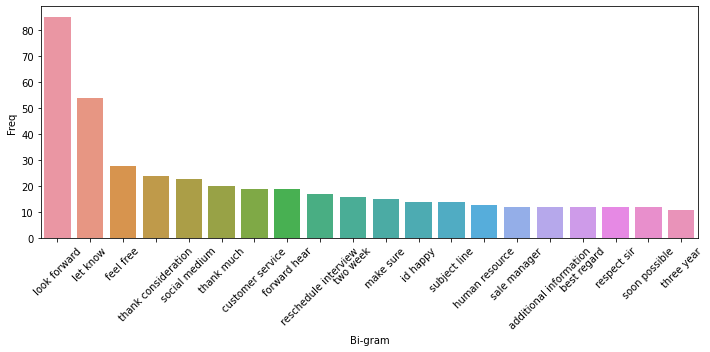

In [135]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

## TRIGRAM ANALYSIS

In [136]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [137]:
top3_words = get_top_n3_words(df['lemmatized_text'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [138]:
top3_df

,Tri-gram,Freq
0,look forward hear,19
1,feel free contact,10
2,look forward speak,8
3,subject line thank,8
4,id happy send,7
...,...,...
195,post craigslist assistant,2
196,craigslist assistant communication,2
197,communication director pique,2
198,director pique interest,2


## TRIGRAM VISUALIZATION

[Text(0, 0, 'look forward hear'),
 Text(0, 0, 'feel free contact'),
 Text(0, 0, 'look forward speak'),
 Text(0, 0, 'subject line thank'),
 Text(0, 0, 'id happy send'),
 Text(0, 0, 'thank much consideration'),
 Text(0, 0, 'look forward meet'),
 Text(0, 0, 'assistant communication director'),
 Text(0, 0, 'feel free reach'),
 Text(0, 0, 'social medium manager'),
 Text(0, 0, 'im look forward'),
 Text(0, 0, 'hello hope great'),
 Text(0, 0, 'hope great like'),
 Text(0, 0, 'great like reach'),
 Text(0, 0, 'like reach linkedin'),
 Text(0, 0, 'reach linkedin request'),
 Text(0, 0, 'linkedin request recommendation'),
 Text(0, 0, 'request recommendation team'),
 Text(0, 0, 'recommendation team project'),
 Text(0, 0, 'team project assign')]

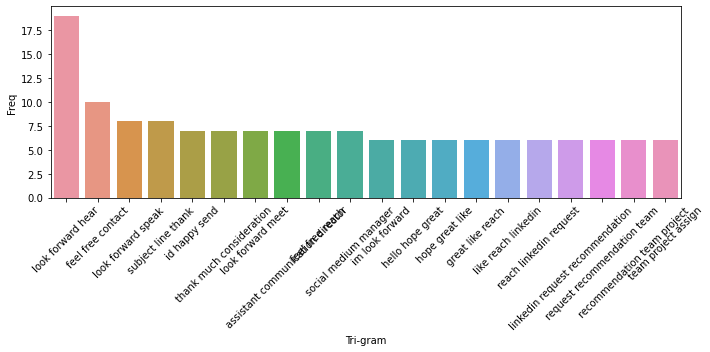

In [139]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# MODEL BUILDING

### Label the output

In [140]:
data['category_id'] = data['EMAIL_TOPICS'].factorize()[0]
from io import StringIO
category_id_df = data[['EMAIL_TOPICS', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'EMAIL_TOPICS']].values)

## VISUALIZATION OF NUMBER OF MAILS FOR EACH TEMPLATE

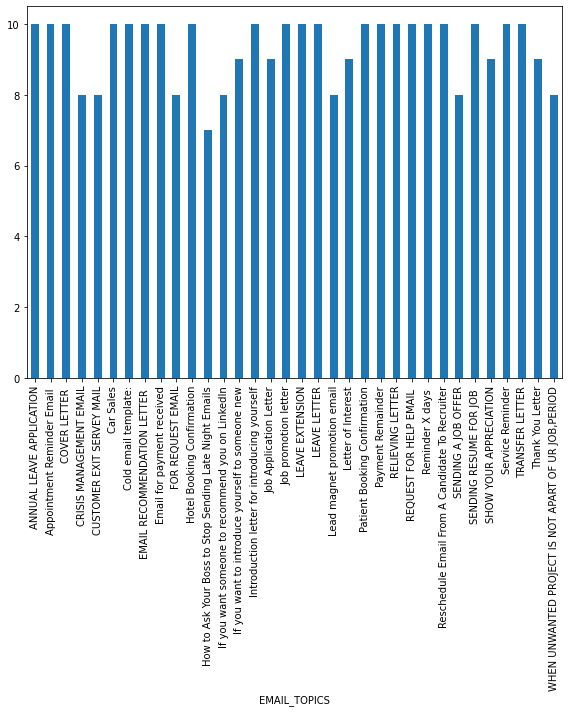

In [141]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,10))
data.groupby('EMAIL_TOPICS').lemmatized_text.count().plot.bar(ylim=0)
plt.show()

## TF-IDF

In [142]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data.lemmatized_text).toarray()
labels = data.category_id
features.shape

(318, 852)

## PERFORMING AND VISUALIZE NGRAM ANALYSIS ON EACH TEMPLATE

In [143]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for EMAIL_TEMPLATES, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(EMAIL_TEMPLATES))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'ANNUAL LEAVE APPLICATION':
  . Most correlated unigrams:
       . avail
       . annual
  . Most correlated bigrams:
       . leave application
       . annual leave
  . Most correlated trigrams:
       . 
# 'Appointment Reminder Email ':
  . Most correlated unigrams:
       . clinic
       . appointment
  . Most correlated bigrams:
       . appointment schedule
       . reminder appointment
  . Most correlated trigrams:
       . 
# 'COVER LETTER ':
  . Most correlated unigrams:
       . proven
       . namenovoresumecom
  . Most correlated bigrams:
       . year experience
       . marketing manager
  . Most correlated trigrams:
       . 
# 'CRISIS MANAGEMENT EMAIL':
  . Most correlated unigrams:
       . protect
       . impact
  . Most correlated bigrams:
       . answer question
       . team member
  . Most correlated trigrams:
       . 
# 'CUSTOMER EXIT SERVEY MAIL':
  . Most correlated unigrams:
       . feedback
       . survey
  . Most correlated bigrams:
       . hi thanks

## SPLIT THE DATA INTO TRAIN AND TEST 

###  FIT WITH CountVectorizer and TfidfTransformer

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_text'], data['EMAIL_TEMPLATES'],test_size=0.26, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [145]:
X_train.shape

(235,)

In [146]:
X_test.shape

(83,)

In [147]:
X_train_tfidf.shape

(235, 3293)

In [148]:
X_test_tfidf.shape

(83, 1690)

# USING MULTIPLE MODEL TO FIND WHICH IS BEST

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [150]:
X1=data['lemmatized_text']
Y1=data['EMAIL_TEMPLATES']
x = data['lemmatized_text']
y = data['EMAIL_TEMPLATES']
vect = CountVectorizer()

In [151]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.05,random_state=42)
x_train_dtm = vect.fit_transform(x_train1)
x_test_dtm = vect.transform(x_test1)

## NAIVE BAYES

In [152]:
NB = MultinomialNB()
NB.fit(x_train_dtm,y_train1)
y_predict = NB.predict(x_test_dtm)
NB_acc = metrics.accuracy_score(y_test1,y_predict)
NB_acc

0.6875

## SGDClassifier

In [153]:
from sklearn.linear_model import LinearRegression 
lm = SGDClassifier()
lm.fit(x_train_dtm,y_train1)
lm_predict = lm.predict(x_test_dtm)
SGD_acc= metrics.accuracy_score(y_test1,lm_predict)
SGD_acc

0.5

## RandomForestClassifier

In [154]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train1)
rf_predict = rf.predict(x_test_dtm)
Random_acc = metrics.accuracy_score(y_test1,rf_predict)
Random_acc

0.75

## XGBClassifier

In [155]:
xg = XGBClassifier()
xg.fit(x_train_dtm,y_train1)
xg_predict = xg.predict(x_test_dtm)
xg_acc = metrics.accuracy_score(y_test1,xg_predict)
xg_acc

[18:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.625

## PassiveAggressiveClassifier

In [156]:
pg = PassiveAggressiveClassifier()
pg.fit(x_train_dtm,y_train1)
pg_predict = pg.predict(x_test_dtm)
pg_acc = metrics.accuracy_score(y_test1,pg_predict)
pg_acc

0.875

## LinearSVC

In [157]:
lv = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', tol=0.0001,
     verbose=0)
lv.fit(x_train_dtm,y_train1)
lv_predict = lv.predict(x_test_dtm)
lv_acc= metrics.accuracy_score(y_test1,lv_predict)
lv_acc

0.8125

In [158]:
data = {'Model':['MultinomialNB','SGDClassifier','RandomForestClassifier','XGBClassifier', 'PassiveAggressiveClassifier','LinearSVC'],'Accuracy':[NB_acc, SGD_acc,Random_acc,xg_acc,pg_acc,lv_acc]}

## ACCURACY SCORE OF EACH MODEL

In [159]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
4,PassiveAggressiveClassifier,0.8750
5,LinearSVC,0.8125
2,RandomForestClassifier,0.7500
0,MultinomialNB,0.6875
3,XGBClassifier,0.6250
1,SGDClassifier,0.5000


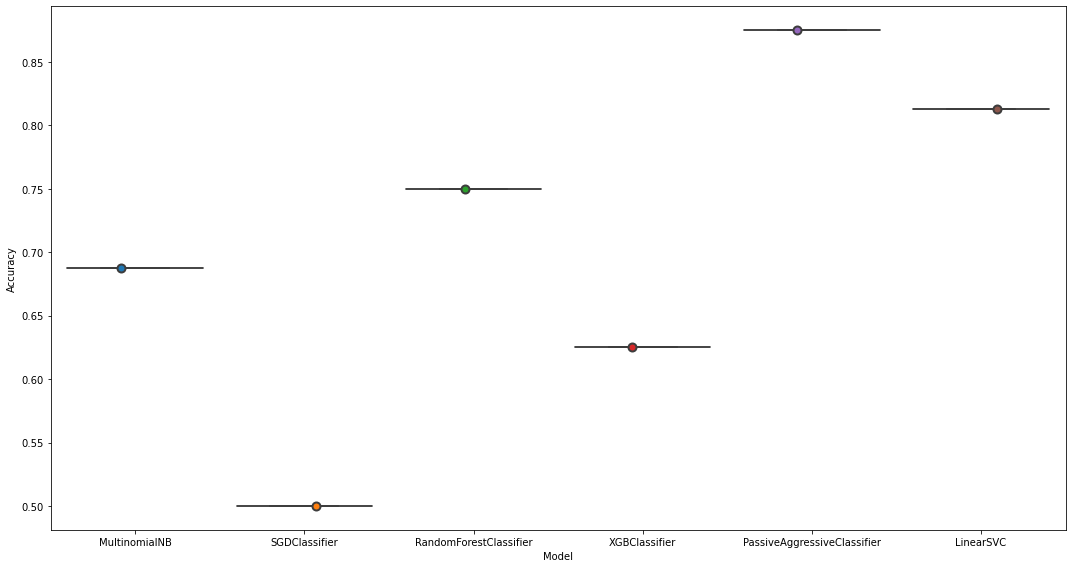

In [160]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y='Accuracy', data=data_model)
sns.stripplot(x='Model', y='Accuracy', data=data_model, 
              size=8, jitter=True, edgecolor="gray", linewidth=2,)
plt.show()

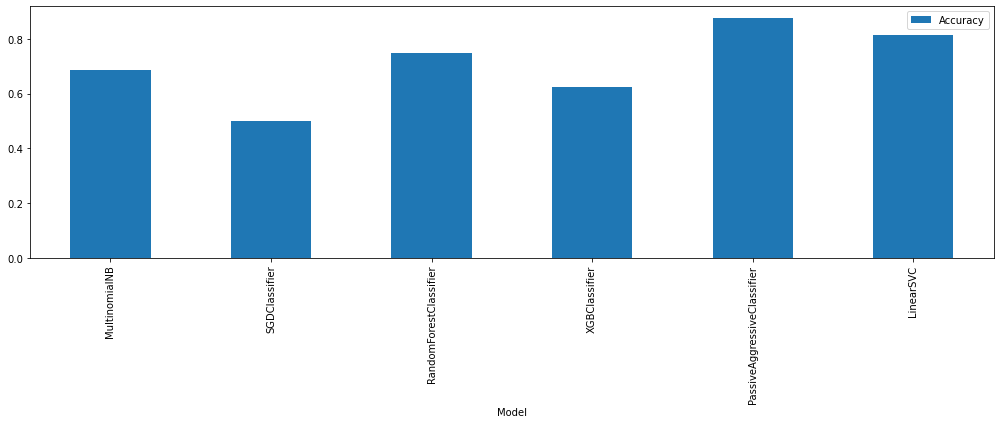

In [161]:
data_model.plot(x="Model", y="Accuracy", kind="bar")

## FROM ACCURACY SCORE PassiveAggressiveClassifier IS SHOWING MAXIMUM ACCURACY.                        

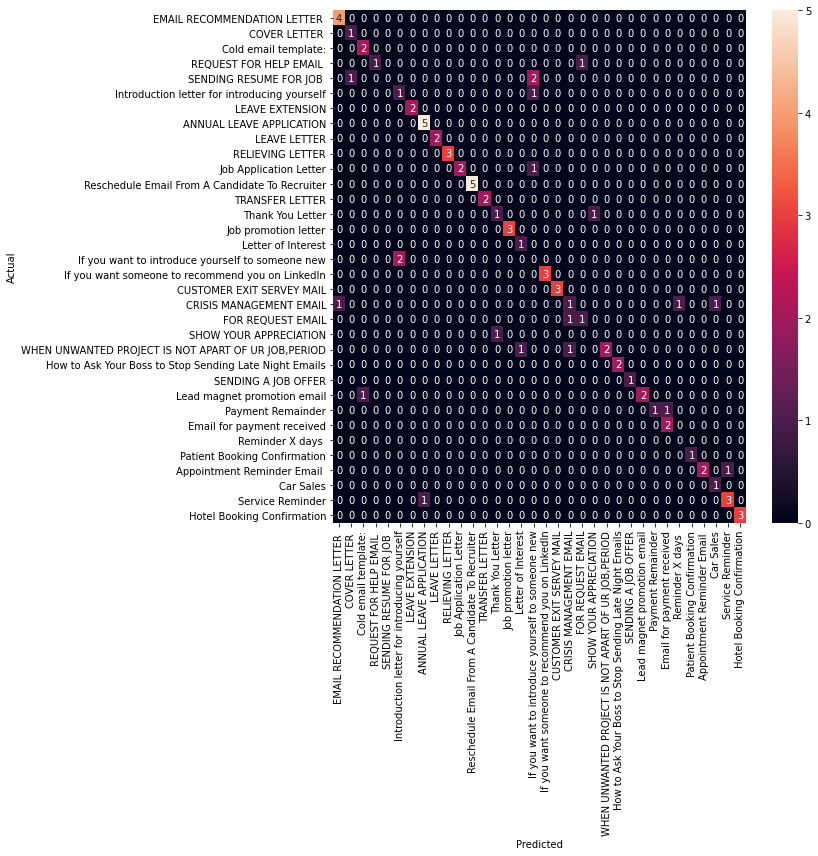

In [162]:
from sklearn.metrics import confusion_matrix
model = PassiveAggressiveClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.26, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.EMAIL_TOPICS.values, yticklabels=category_id_df.EMAIL_TOPICS.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [163]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['EMAIL_TOPICS'].unique()))

                                                        precision    recall  f1-score   support

                          EMAIL RECOMMENDATION LETTER        0.80      1.00      0.89         4
                                         COVER LETTER        0.50      1.00      0.67         1
                                  Cold email template:       0.67      1.00      0.80         2
                               REQUEST FOR HELP EMAIL        1.00      0.50      0.67         2
                               SENDING RESUME FOR JOB        0.00      0.00      0.00         3
          Introduction letter for introducing yourself       0.33      0.50      0.40         2
                                       LEAVE EXTENSION       1.00      1.00      1.00         2
                              ANNUAL LEAVE APPLICATION       0.83      1.00      0.91         5
                                          LEAVE LETTER       1.00      1.00      1.00         2
                                      R

## LETS WE FINALIZE THE MODEL USING PassiveAggressiveClassifier

In [164]:
X_COUNT = count_vect.fit_transform(X1)
X_TFIDF = tfidf_transformer.fit_transform(X_COUNT)

In [165]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, Y1)

## SAMPLE PREDICTION OF FINAL MODEL

In [166]:
print(modelf.predict(count_vect.transform(["sick leave"])))

['ANNUAL LEAVE APPLICATION                                                                                 Subject: Annual leave application\nDear (Recipient’s Name)\nI am writing this email with reference to my remaining annual leave quota. I am planning to go on a trip to Europe with my family. Thus, I would like to avail my remaining 25 days of annual leave from (Date) to (Date) \nI have assigned my duties to ( name of a team member) for the current project we are working on. He/She has been working with me and understands the role effectively. Also, I am looking for all the essential inputs required for the project before I leave for the vacation.\nI request you to consider my leave request. During my absence, I can be reached at my phone number and email id (Email address and contact no). \nYours sincerely\n(Your Name)']


In [167]:
print(modelf.predict(count_vect.transform(["appointment schedule"])))

['Appointment Reminder Email                                                                                Hi [Client Name],\n\nThis is a friendly reminder that we have an appointment scheduled for you on [Appointment Date] at [Appointment Time].\nIf you’re wondering how to get to us, here are the [Directions], and if you have any questions, you’ll be able to find the answers here (link).\nDon’t forget:\n\nPlease bring ______ with you.\nTry to arrive 15 minutes early.\nIf you need to re-schedule, you can give us a call on [Contact Number].\nSee you soon!\n\nBest Regards,\nThe [Practice Name] Team\n[eSignature']


# SAVE THE MODEL IN PICKLE FILE 

In [168]:
import pickle

In [169]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, Y1)

    # Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

    # Save the model
mod_file = 'classification.model'
pickle.dump(modelf, open(mod_file, 'wb'))

# Conclusion
## - Our email template worked well with PassiveAggressiveClassifier model.